In [3]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import math
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error


In [25]:
dataset_expert_name = 'predict_catBoost_trix.csv'
dataset_for_check_name = 'predict_catBoost_intervals.csv'

expert_feature_column = 'catBoost_trix'
for_check_feature_column = 'catBoost'

In [26]:
expert_df = pd.read_csv(dataset_expert_name, sep=',')# из файла строку с единицами измерения надо удалить
for_check_df = pd.read_csv(dataset_for_check_name, sep=',')

In [27]:
expert_df.columns

Index(['LAYER', 'MD', 'wellName', 'catBoost_trix'], dtype='object')

In [28]:
for_check_df.columns

Index(['LAYER', 'MD', 'wellName', 'catBoost_prod_52', 'catBoost_prod_152',
       'catBoost_prod_100', 'catBoost'],
      dtype='object')

In [29]:
def merge_intervals(row):
    one = int(row['predict_013578_12'])
    two = int(row['predict'])
    if one > -1:
        return one
    if two > -1:
        return two
    return -9999

expert_df['merge_predict_013578_12_and_intervals'] = expert_df.apply(merge_intervals, axis=1)

KeyError: ('predict_013578_12', 'occurred at index 0')

In [39]:
expert_df[expert_df['merge_predict_013578_12_and_intervals'] > -1].describe()

BK  BK_last_12.0  BK_last_15.0   BK_last_3.0   BK_last_6.0  \
count  4.522960e+05  4.522960e+05  4.522960e+05  4.522960e+05  4.522960e+05   
mean  -2.619031e+03 -2.729229e+03 -2.756902e+03 -2.646581e+03 -2.674135e+03   
std    1.050589e+04  1.053020e+04  1.053612e+04  1.051208e+04  1.051819e+04   
min   -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03   
25%   -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03   
50%    5.900000e+00  5.850000e+00  5.840000e+00  5.890000e+00  5.880000e+00   
75%    8.000000e+00  7.990000e+00  7.980000e+00  8.000000e+00  8.000000e+00   
max    6.402033e+06  6.402033e+06  6.402033e+06  6.402033e+06  6.402033e+06   

        BK_last_9.0  BK_next_12.0  BK_next_15.0   BK_next_3.0   BK_next_6.0  \
count  4.522960e+05  4.522960e+05  4.522960e+05  4.522960e+05  4.522960e+05   
mean  -2.701685e+03 -2.719078e+03 -2.748014e+03 -2.638083e+03 -2.663544e+03   
std    1.052423e+04  1.052788e+04  1.053409e+04  1.051017e+04  1.051584e+04   
min   -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03   
25%   -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03   
50%    5.860000e+00  5.810000e+00  5.800000e+00  5.880000e+00  5.860000e+00   
75%    8.000000e+00  7.923000e+00  7.900000e+00  8.000000e+00  7.980000e+00   
max    6.402033e+06  6.402033e+06  6.402033e+06  6.402033e+06  6.402033e+06   

       ...      predict_5      predict_7      predict_8     predict_12  \
count  ...  452296.000000  452296.000000  452296.000000  452296.000000   
mean   ...       5.157114       5.883174       5.531028       6.160643   
std    ...       1.262892       1.654378       1.814982       2.679520   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...       5.000000       5.000000       5.000000       5.000000   
50%    ...       5.000000       5.000000       5.000000       5.000000   
75%    ...       5.000000       7.000000       7.000000       7.000000   
max    ...      12.000000      12.000000      12.000000      12.000000   

       restruct_Facies_shift  restruct_Facies_shift_all   predict_last  \
count          452296.000000              452296.000000  452296.000000   
mean                5.519715               -8977.116435       4.101151   
std                 1.812706                3029.743072       2.692173   
min                 0.000000               -9999.000000       0.000000   
25%                 5.000000               -9999.000000       3.000000   
50%                 5.000000               -9999.000000       5.000000   
75%                 7.000000               -9999.000000       5.000000   
max                12.000000                  12.000000      12.000000   

       predict_013578_12        predict  merge_predict_013578_12_and_intervals  
count      452296.000000  452296.000000                          452296.000000  
mean        -3419.782289   -6574.221023                               4.996688  
std          4746.914127    4746.750783                               2.022328  
min         -9999.000000   -9999.000000                               0.000000  
25%         -9999.000000   -9999.000000                               5.000000  
50%             5.000000   -9999.000000                               5.000000  
75%             5.000000       5.000000                               5.000000  
max            12.000000      12.000000                              12.000000  

[8 rows x 70 columns]

In [8]:
expert_df.describe()

MD  catBoost_prod_52  catBoost_prod_152  catBoost_prod_100  \
count  314249.000000     314249.000000      314249.000000      314249.000000   
mean     2317.515423          3.019195           3.018228           3.019831   
std       282.305311          0.276427           0.269404           0.280949   
min      1850.200000          3.000000           3.000000           3.000000   
25%      2080.600000          3.000000           3.000000           3.000000   
50%      2305.600000          3.000000           3.000000           3.000000   
75%      2530.800000          3.000000           3.000000           3.000000   
max      3180.800000          7.000000           7.000000           7.000000   

           catBoost  
count  314249.00000  
mean        3.00947  
std         0.19440  
min         3.00000  
25%         3.00000  
50%         3.00000  
75%         3.00000  
max         7.00000

In [9]:
for_check_df.describe()

MD       catBoost
count  348229.000000  348229.000000
mean     2332.480056       3.023732
std       293.709269       0.307186
min      1850.200000       3.000000
25%      2087.800000       3.000000
50%      2317.400000       3.000000
75%      2547.200000       3.000000
max      3270.800000       7.000000

In [208]:
#если надо отфильтровать значения по глубине
#expert_df = expert_df[expert_df['MD'] > 2000]
#expert_df = expert_df[expert_df['MD'] < 3000]
#если надо отфильтровать значения по наличию литологии
#expert_df = expert_df[expert_df['LIT'] > -1]

expert_df['wellName'] = expert_df['wellName'].apply(lambda x: x.replace('***', 'spk'))

In [30]:
def get_merge_df(one, two):
    one_copy =  one.copy()
    tho_copy = two.copy()
    new_df = pd.merge(one_copy, tho_copy,  how='inner', left_on=['wellName','MD'], right_on = ['wellName','MD'])
    return new_df

wells_with_predict = get_merge_df(expert_df, for_check_df)

In [31]:
wells_with_predict

LAYER_x      MD   wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
0        -9999  1850.2   spk1059L              3   -9999               3.0   
1        -9999  1850.4   spk1059L              3   -9999               3.0   
2        -9999  1850.6   spk1059L              3   -9999               3.0   
3        -9999  1850.8   spk1059L              3   -9999               3.0   
4        -9999  1851.0   spk1059L              3   -9999               3.0   
...        ...     ...        ...            ...     ...               ...   
314244   UV1_3  2697.2  spk1749PL              3   UV1_3               3.0   
314245   UV1_3  2697.4  spk1749PL              3   UV1_3               3.0   
314246   UV1_3  2697.6  spk1749PL              3   UV1_3               3.0   
314247   UV1_3  2697.8  spk1749PL              3   UV1_3               3.0   
314248   UV1_3  2698.0  spk1749PL              3   UV1_3               3.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
0                     3.0                3.0       3.0  
1                     3.0                3.0       3.0  
2                     3.0                3.0       3.0  
3                     3.0                3.0       3.0  
4                     3.0                3.0       3.0  
...                   ...                ...       ...  
314244                3.0                3.0       3.0  
314245                3.0                3.0       3.0  
314246                3.0                3.0       3.0  
314247                3.0                3.0       3.0  
314248                3.0                3.0       3.0  

[314249 rows x 9 columns]

In [32]:
wells_with_predict[wells_with_predict[for_check_feature_column] > -1]

LAYER_x      MD   wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
0        -9999  1850.2   spk1059L              3   -9999               3.0   
1        -9999  1850.4   spk1059L              3   -9999               3.0   
2        -9999  1850.6   spk1059L              3   -9999               3.0   
3        -9999  1850.8   spk1059L              3   -9999               3.0   
4        -9999  1851.0   spk1059L              3   -9999               3.0   
...        ...     ...        ...            ...     ...               ...   
314244   UV1_3  2697.2  spk1749PL              3   UV1_3               3.0   
314245   UV1_3  2697.4  spk1749PL              3   UV1_3               3.0   
314246   UV1_3  2697.6  spk1749PL              3   UV1_3               3.0   
314247   UV1_3  2697.8  spk1749PL              3   UV1_3               3.0   
314248   UV1_3  2698.0  spk1749PL              3   UV1_3               3.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
0                     3.0                3.0       3.0  
1                     3.0                3.0       3.0  
2                     3.0                3.0       3.0  
3                     3.0                3.0       3.0  
4                     3.0                3.0       3.0  
...                   ...                ...       ...  
314244                3.0                3.0       3.0  
314245                3.0                3.0       3.0  
314246                3.0                3.0       3.0  
314247                3.0                3.0       3.0  
314248                3.0                3.0       3.0  

[314249 rows x 9 columns]

In [33]:
#оставляем все значения, где есть фации
wells_with_facies = wells_with_predict[wells_with_predict[expert_feature_column] > -1]
wells_with_facies = wells_with_facies[wells_with_facies[for_check_feature_column] > -1]

In [34]:
wells_with_facies.describe()

MD  catBoost_trix  catBoost_prod_52  catBoost_prod_152  \
count  314249.000000  314249.000000     314249.000000      314249.000000   
mean     2317.515423       3.022899          3.019195           3.018228   
std       282.305311       0.301782          0.276427           0.269404   
min      1850.200000       3.000000          3.000000           3.000000   
25%      2080.600000       3.000000          3.000000           3.000000   
50%      2305.600000       3.000000          3.000000           3.000000   
75%      2530.800000       3.000000          3.000000           3.000000   
max      3180.800000       7.000000          7.000000           7.000000   

       catBoost_prod_100      catBoost  
count      314249.000000  314249.00000  
mean            3.019831       3.00947  
std             0.280949       0.19440  
min             3.000000       3.00000  
25%             3.000000       3.00000  
50%             3.000000       3.00000  
75%             3.000000       3.00000  
max             7.000000       7.00000

In [35]:
wells_with_facies

LAYER_x      MD   wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
0        -9999  1850.2   spk1059L              3   -9999               3.0   
1        -9999  1850.4   spk1059L              3   -9999               3.0   
2        -9999  1850.6   spk1059L              3   -9999               3.0   
3        -9999  1850.8   spk1059L              3   -9999               3.0   
4        -9999  1851.0   spk1059L              3   -9999               3.0   
...        ...     ...        ...            ...     ...               ...   
314244   UV1_3  2697.2  spk1749PL              3   UV1_3               3.0   
314245   UV1_3  2697.4  spk1749PL              3   UV1_3               3.0   
314246   UV1_3  2697.6  spk1749PL              3   UV1_3               3.0   
314247   UV1_3  2697.8  spk1749PL              3   UV1_3               3.0   
314248   UV1_3  2698.0  spk1749PL              3   UV1_3               3.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
0                     3.0                3.0       3.0  
1                     3.0                3.0       3.0  
2                     3.0                3.0       3.0  
3                     3.0                3.0       3.0  
4                     3.0                3.0       3.0  
...                   ...                ...       ...  
314244                3.0                3.0       3.0  
314245                3.0                3.0       3.0  
314246                3.0                3.0       3.0  
314247                3.0                3.0       3.0  
314248                3.0                3.0       3.0  

[314249 rows x 9 columns]

In [36]:
def view_statistic(target, labels_predict):
    print('RMSE ошибка равна',mean_squared_error(target, labels_predict))
    print(classification_report(target, labels_predict))

In [37]:
def get_well_dfs(all_well_df):
    wall_names_ = all_well_df['wellName'].unique()
    wells = []
    for name in wall_names_:
        well = all_well_df[all_well_df['wellName'] == name]
        wells.append(well)
    return wells


def view_wells_with_7_facies(wells_with_facies, column):
    wells = wells_with_facies[wells_with_facies[column] == 7]
    print('Скважины с фацией 7 по столбцу ', column)
    print('Количество ', str(len(wells['wellName'].unique())))
    print(wells['wellName'].unique())


def view_statistic_for_wells_facies_7(wells_with_facies):
    def change_facies(x):
        if x == 7:
            return 7
        return 3
    
    #посмотрим на общюю статистику по скважинам
    count_wells = len(wells_with_facies['wellName'].unique())
    print('Всего скважин, где есть экспертное заключение по фациям. Количество', str(count_wells))
    print(wells_with_facies['wellName'].unique())
    view_wells_with_7_facies(wells_with_facies, expert_feature_column)
    view_wells_with_7_facies(wells_with_facies, for_check_feature_column)

    #для корректной оценки, сделаем два класса 7 и 3 (не семь) в экспертном наборе
    wells_clone = wells_with_facies.copy()
    wells_clone[expert_feature_column] = wells_clone[expert_feature_column].apply(lambda x: change_facies(x))
    
    view_statistic(wells_clone[expert_feature_column], wells_clone[for_check_feature_column])
    
    wells_clone = wells_clone[wells_clone[for_check_feature_column] == 7]
    
    print('точность после чистки данных')

    view_statistic(wells_clone[expert_feature_column], wells_clone[for_check_feature_column])
    
    #разобьем набор данных на скважины
    wells_samples_df = get_well_dfs(wells_clone)
    max_rmse = 0
    min_rmse = 99999
    name_bad_well = ""
    name_best_well = ""
    for well in wells_samples_df:# посмотрим оценки для каждой скважины well.
        print()
        print()
        print('Скважина ', well['wellName'].unique())
        view_statistic(well[expert_feature_column], well[for_check_feature_column])
        display(well) # или print(well)
        
        rmse = mean_squared_error(well[expert_feature_column], well[for_check_feature_column])
        if (rmse > max_rmse):
            max_rmse = rmse
            name_bad_well = well['wellName'].unique()[0]

        if (rmse < min_rmse):
            min_rmse = rmse
            name_best_well = well['wellName'].unique()[0]

    print("Самая интересная скважина")
    print(name_best_well)
    print('RMSE ошибка равна', min_rmse)
    well_min_rmse = wells_with_facies[wells_with_facies['wellName'] == name_best_well]
    view_statistic(well_min_rmse[expert_feature_column], well_min_rmse[for_check_feature_column])

    print("Самая печальная скважина")
    print(name_bad_well)
    print('RMSE ошибка равна', max_rmse)
    well_max_rmse = wells_with_facies[wells_with_facies['wellName'] == name_bad_well]
    view_statistic(well_max_rmse[expert_feature_column], well_max_rmse[for_check_feature_column])
    
view_statistic_for_wells_facies_7(wells_with_facies) 

Всего скважин, где есть экспертное заключение по фациям. Количество 70
['spk1059L' 'spk1061' 'spk146R' 'spk1504' 'spk1506L' 'spk1508' 'spk1515'
 'spk1517' 'spk1518L' 'spk1519L' 'spk1523' 'spk1524' 'spk1525' 'spk1528'
 'spk1529' 'spk1530' 'spk1531' 'spk1537' 'spk1700' 'spk1701' 'spk1702'
 'spk1703' 'spk1704' 'spk1705' 'spk1706L' 'spk1707' 'spk1708' 'spk1709'
 'spk1710' 'spk1741' 'spk1742' 'spk1745L' 'spk1750' 'spk1753' 'spk1760'
 'spk1764' 'spk1765' 'spk1779' 'spk1791' 'spk1792' 'spk1793' 'spk1794'
 'spk1796' 'spk1805' 'spk214P' 'spk236' 'spk401' 'spk404' 'spk407R'
 'spk408' 'spk421R' 'spk422R' 'spk425' 'spk437' 'spk467' 'spk490'
 'spk564P' 'spk805' 'spk808' 'spk833R' 'spk870PL' 'spk902' 'spk904'
 'spk908' 'spk914' 'spk924L' 'spk1150' 'spk1743' 'spk1746' 'spk1749PL']
Скважины с фацией 7 по столбцу  catBoost_trix
Количество  46
['spk1059L' 'spk1061' 'spk146R' 'spk1504' 'spk1506L' 'spk1517' 'spk1519L'
 'spk1523' 'spk1524' 'spk1525' 'spk1530' 'spk1537' 'spk1701' 'spk1702'
 'spk1704' 'spk17

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
14807   UV1_1  2600.4  spk146R              7   UV1_1               7.0   
14808   UV1_1  2600.6  spk146R              7   UV1_1               7.0   
14814   UV1_1  2601.8  spk146R              7   UV1_1               7.0   
14815   UV1_1  2602.0  spk146R              7   UV1_1               7.0   
14816   UV1_1  2602.2  spk146R              3   UV1_1               7.0   
14817   UV1_1  2602.4  spk146R              3   UV1_1               7.0   
14821   UV1_1  2603.2  spk146R              3   UV1_1               7.0   

       catBoost_prod_152  catBoost_prod_100  catBoost  
14807                7.0                7.0       7.0  
14808                7.0                7.0       7.0  
14814                7.0                7.0       7.0  
14815                7.0                7.0       7.0  
14816                7.0                7.0       7.0  
14817                7.0                7.0       7.0  
14821                7.0                7.0       7.0



Скважина  ['spk1517']
RMSE ошибка равна 12.631578947368421
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        30
           7       0.21      1.00      0.35         8

    accuracy                           0.21        38
   macro avg       0.11      0.50      0.17        38
weighted avg       0.04      0.21      0.07        38



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
41898   UV1_1  2647.6  spk1517              3   UV1_1               7.0   
41899   UV1_1  2647.8  spk1517              3   UV1_1               7.0   
41900   UV1_1  2648.0  spk1517              7   UV1_1               7.0   
41901   UV1_1  2648.2  spk1517              7   UV1_1               7.0   
41902   UV1_1  2648.4  spk1517              7   UV1_1               7.0   
41903   UV1_1  2648.6  spk1517              7   UV1_1               7.0   
41904   UV1_1  2648.8  spk1517              7   UV1_1               7.0   
41905   UV1_1  2649.0  spk1517              7   UV1_1               7.0   
41906   UV1_1  2649.2  spk1517              3   UV1_1               7.0   
41907   UV1_1  2649.4  spk1517              3   UV1_1               7.0   
41908   UV1_1  2649.6  spk1517              3   UV1_1               7.0   
41909   UV1_1  2649.8  spk1517              3   UV1_1               7.0   
41910   UV1_1  2650.0  spk1517              3   UV1_1               7.0   
41911   UV1_1  2650.2  spk1517              3   UV1_1               7.0   
41912   UV1_1  2650.4  spk1517              3   UV1_1               7.0   
41913   UV1_1  2650.6  spk1517              3   UV1_1               7.0   
41914   UV1_1  2650.8  spk1517              3   UV1_1               7.0   
41915   UV1_1  2651.0  spk1517              3   UV1_1               7.0   
41916   UV1_1  2651.2  spk1517              3   UV1_1               7.0   
41917   UV1_1  2651.4  spk1517              3   UV1_1               7.0   
41918   UV1_1  2651.6  spk1517              3   UV1_1               7.0   
41919   UV1_1  2651.8  spk1517              3   UV1_1               7.0   
41920   UV1_1  2652.0  spk1517              3   UV1_1               7.0   
41921   UV1_1  2652.2  spk1517              3   UV1_1               7.0   
41922   UV1_1  2652.4  spk1517              3   UV1_1               7.0   
41923   UV1_1  2652.6  spk1517              7   UV1_1               7.0   
41924   UV1_1  2652.8  spk1517              7   UV1_1               7.0   
41929   UV1_1  2653.8  spk1517              3   UV1_1               7.0   
41930   UV1_1  2654.0  spk1517              3   UV1_1               7.0   
41931   UV1_1  2654.2  spk1517              3   UV1_1               7.0   
41932   UV1_1  2654.4  spk1517              3   UV1_1               7.0   
41933   UV1_1  2654.6  spk1517              3   UV1_1               7.0   
41934   UV1_1  2654.8  spk1517              3   UV1_1               7.0   
41935   UV1_1  2655.0  spk1517              3   UV1_1               7.0   
41936   UV1_1  2655.2  spk1517              3   UV1_1               7.0   
41937   UV1_1  2655.4  spk1517              3   UV1_1               7.0   
41938   UV1_1  2655.6  spk1517              3   UV1_1               7.0   
41984   UV1_1  2664.8  spk1517              3   UV1_1               7.0   

       catBoost_prod_152  catBoost_prod_100  catBoost  
41898                7.0                7.0       7.0  
41899                7.0                7.0       7.0  
41900                7.0                7.0       7.0  
41901                7.0                7.0       7.0  
41902                7.0                7.0       7.0  
41903                7.0                7.0       7.0  
41904                7.0                7.0       7.0  
41905                7.0                7.0       7.0  
41906                7.0                7.0       7.0  
41907                7.0                7.0       7.0  
41908                7.0                7.0       7.0  
41909                7.0                7.0       7.0  
41910                7.0                7.0       7.0  
41911                7.0                7.0       7.0  
41912                7.0                7.0       7.0  
41913                7.0                7.0       7.0  
41914                7.0                7.0       7.0  
41915                7.0                7.0       7.0  
41916           



Скважина  ['spk1519L']
RMSE ошибка равна 6.909090909090909
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        19
           7       0.57      1.00      0.72        25

    accuracy                           0.57        44
   macro avg       0.28      0.50      0.36        44
weighted avg       0.32      0.57      0.41        44



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD  wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
48612   -9999  2377.0  spk1519L              3   -9999               7.0   
49619   -9999  2578.4  spk1519L              3   -9999               7.0   
50354   -9999  2725.4  spk1519L              3   -9999               7.0   
50355   -9999  2725.6  spk1519L              3   -9999               7.0   
50356   -9999  2725.8  spk1519L              3   -9999               7.0   
50357   -9999  2726.0  spk1519L              3   -9999               7.0   
50358   -9999  2726.2  spk1519L              7   -9999               7.0   
50359   -9999  2726.4  spk1519L              7   -9999               7.0   
50360   -9999  2726.6  spk1519L              7   -9999               7.0   
50361   -9999  2726.8  spk1519L              7   -9999               7.0   
50362   -9999  2727.0  spk1519L              3   -9999               7.0   
50363   -9999  2727.2  spk1519L              3   -9999               7.0   
50364   -9999  2727.4  spk1519L              3   -9999               7.0   
50365   -9999  2727.6  spk1519L              3   -9999               7.0   
50366   -9999  2727.8  spk1519L              3   -9999               7.0   
50367   -9999  2728.0  spk1519L              3   -9999               7.0   
50368   -9999  2728.2  spk1519L              3   -9999               7.0   
50369   -9999  2728.4  spk1519L              3   -9999               7.0   
50370   -9999  2728.6  spk1519L              3   -9999               7.0   
50456   -9999  2745.8  spk1519L              7   -9999               7.0   
50458   -9999  2746.2  spk1519L              7   -9999               7.0   
50459   -9999  2746.4  spk1519L              7   -9999               7.0   
50460   -9999  2746.6  spk1519L              7   -9999               7.0   
50461   -9999  2746.8  spk1519L              7   -9999               7.0   
50462   -9999  2747.0  spk1519L              7   -9999               7.0   
50465   -9999  2747.6  spk1519L              7   -9999               7.0   
50511   -9999  2756.8  spk1519L              7   -9999               7.0   
50512   -9999  2757.0  spk1519L              7   -9999               7.0   
50513   -9999  2757.2  spk1519L              7   -9999               7.0   
50514   -9999  2757.4  spk1519L              7   -9999               7.0   
50515   -9999  2757.6  spk1519L              7   -9999               7.0   
50855   UV1_1  2825.6  spk1519L              7   UV1_1               7.0   
50856   UV1_1  2825.8  spk1519L              7   UV1_1               7.0   
50857   UV1_1  2826.0  spk1519L              7   UV1_1               7.0   
50858   UV1_1  2826.2  spk1519L              7   UV1_1               7.0   
50859   UV1_1  2826.4  spk1519L              7   UV1_1               7.0   
50894   UV1_1  2833.4  spk1519L              7   UV1_1               7.0   
50895   UV1_1  2833.6  spk1519L              3   UV1_1               7.0   
50896   UV1_1  2833.8  spk1519L              7   UV1_1               7.0   
50917   UV1_1  2838.0  spk1519L              3   UV1_1               7.0   
50918   UV1_1  2838.2  spk1519L              3   UV1_1               7.0   
50940   UV1_1  2842.6  spk1519L              7   UV1_1               7.0   
50941   UV1_1  2842.8  spk1519L              7   UV1_1               7.0   
50955   UV1_1  2845.6  spk1519L              3   UV1_1               7.0   

       catBoost_prod_152  catBoost_prod_100  catBoost  
48612                7.0                7.0       7.0  
49619                7.0                7.0       7.0  
50354                7.0                7.0       7.0  
50355                7.0                7.0       7.0  
50356                7.0                7.0       7.0  
50357                7.0                7.0       7.0  
50358                7.0                7.0       7.0  
50359                7.0                7.0       7.0  
50360                7.0                7.0       7.0  
50361                7.0 



Скважина  ['spk1523']
RMSE ошибка равна 6.133333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        23
           7       0.62      1.00      0.76        37

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
54986   UV1_1  2588.2  spk1523              7   UV1_1               7.0   
54987   UV1_1  2588.4  spk1523              7   UV1_1               7.0   
54988   UV1_1  2588.6  spk1523              7   UV1_1               7.0   
54990   UV1_1  2589.0  spk1523              7   UV1_1               7.0   
54992   UV1_1  2589.4  spk1523              7   UV1_1               7.0   
54993   UV1_1  2589.6  spk1523              7   UV1_1               7.0   
54994   UV1_1  2589.8  spk1523              7   UV1_1               7.0   
54995   UV1_1  2590.0  spk1523              7   UV1_1               7.0   
54996   UV1_1  2590.2  spk1523              7   UV1_1               7.0   
54997   UV1_1  2590.4  spk1523              7   UV1_1               7.0   
54998   UV1_1  2590.6  spk1523              7   UV1_1               7.0   
54999   UV1_1  2590.8  spk1523              7   UV1_1               7.0   
55000   UV1_1  2591.0  spk1523              7   UV1_1               7.0   
55001   UV1_1  2591.2  spk1523              7   UV1_1               7.0   
55002   UV1_1  2591.4  spk1523              7   UV1_1               7.0   
55003   UV1_1  2591.6  spk1523              7   UV1_1               7.0   
55004   UV1_1  2591.8  spk1523              7   UV1_1               7.0   
55005   UV1_1  2592.0  spk1523              7   UV1_1               7.0   
55006   UV1_1  2592.2  spk1523              7   UV1_1               7.0   
55007   UV1_1  2592.4  spk1523              7   UV1_1               7.0   
55008   UV1_1  2592.6  spk1523              7   UV1_1               7.0   
55009   UV1_1  2592.8  spk1523              7   UV1_1               7.0   
55010   UV1_1  2593.0  spk1523              7   UV1_1               7.0   
55018   UV1_1  2594.6  spk1523              7   UV1_1               7.0   
55019   UV1_1  2594.8  spk1523              7   UV1_1               7.0   
55022   UV1_1  2595.4  spk1523              7   UV1_1               7.0   
55023   UV1_1  2595.6  spk1523              3   UV1_1               7.0   
55024   UV1_1  2595.8  spk1523              3   UV1_1               7.0   
55025   UV1_1  2596.0  spk1523              3   UV1_1               7.0   
55026   UV1_1  2596.2  spk1523              3   UV1_1               7.0   
55058   UV1_1  2602.6  spk1523              3   UV1_1               7.0   
55059   UV1_1  2602.8  spk1523              3   UV1_1               7.0   
55060   UV1_1  2603.0  spk1523              7   UV1_1               7.0   
55061   UV1_1  2603.2  spk1523              7   UV1_1               7.0   
55062   UV1_1  2603.4  spk1523              7   UV1_1               7.0   
55063   UV1_1  2603.6  spk1523              7   UV1_1               7.0   
55064   UV1_1  2603.8  spk1523              7   UV1_1               7.0   
55065   UV1_1  2604.0  spk1523              7   UV1_1               7.0   
55073   UV1_1  2605.6  spk1523              3   UV1_1               7.0   
55074   UV1_1  2605.8  spk1523              3   UV1_1               7.0   
55075   UV1_1  2606.0  spk1523              3   UV1_1               7.0   
55076   UV1_1  2606.2  spk1523              3   UV1_1               7.0   
55077   UV1_1  2606.4  spk1523              3   UV1_1               7.0   
55078   UV1_1  2606.6  spk1523              3   UV1_1               7.0   
55079   UV1_1  2606.8  spk1523              3   UV1_1               7.0   
55080   UV1_1  2607.0  spk1523              7   UV1_1               7.0   
55081   UV1_1  2607.2  spk1523              7   UV1_1               7.0   
55082   UV1_1  2607.4  spk1523              7   UV1_1               7.0   
55083   UV1_1  2607.6  spk1523              7   UV1_1               7.0   
55084   UV1_1  2607.8  spk1523              3   UV1_1               7.0   
55085   UV1_1  2608.0  spk1523              3   UV1_1               7.0   
55086   UV1_1  2608.2  spk1523              7   UV1_1               7.0   
55087   UV1_1  2608.4  spk1523 



Скважина  ['spk1525']
RMSE ошибка равна 6.72
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        21
           7       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
63707   UV1_1  2687.4  spk1525              7   UV1_1               7.0   
63709   UV1_1  2687.8  spk1525              7   UV1_1               7.0   
63710   UV1_1  2688.0  spk1525              7   UV1_1               7.0   
63734   UV1_1  2692.8  spk1525              7   UV1_1               7.0   
63736   UV1_1  2693.2  spk1525              7   UV1_1               7.0   
63738   UV1_1  2693.6  spk1525              7   UV1_1               7.0   
63747   UV1_1  2695.4  spk1525              7   UV1_1               7.0   
63748   UV1_1  2695.6  spk1525              7   UV1_1               7.0   
63749   UV1_1  2695.8  spk1525              7   UV1_1               7.0   
63750   UV1_1  2696.0  spk1525              7   UV1_1               7.0   
63751   UV1_1  2696.2  spk1525              7   UV1_1               7.0   
63754   UV1_1  2696.8  spk1525              7   UV1_1               7.0   
63758   UV1_1  2697.6  spk1525              7   UV1_1               7.0   
63775   UV1_1  2701.0  spk1525              3   UV1_1               7.0   
63776   UV1_1  2701.2  spk1525              3   UV1_1               7.0   
63777   UV1_1  2701.4  spk1525              3   UV1_1               7.0   
63779   UV1_1  2701.8  spk1525              3   UV1_1               7.0   
63783   UV1_1  2702.6  spk1525              7   UV1_1               7.0   
63784   UV1_1  2702.8  spk1525              7   UV1_1               7.0   
63785   UV1_1  2703.0  spk1525              7   UV1_1               7.0   
63786   UV1_1  2703.2  spk1525              7   UV1_1               7.0   
63787   UV1_1  2703.4  spk1525              7   UV1_1               7.0   
63790   UV1_1  2704.0  spk1525              3   UV1_1               7.0   
63791   UV1_1  2704.2  spk1525              3   UV1_1               7.0   
63792   UV1_1  2704.4  spk1525              3   UV1_1               7.0   
63793   UV1_1  2704.6  spk1525              3   UV1_1               7.0   
63794   UV1_1  2704.8  spk1525              3   UV1_1               7.0   
63795   UV1_1  2705.0  spk1525              3   UV1_1               7.0   
63796   UV1_1  2705.2  spk1525              3   UV1_1               7.0   
63797   UV1_1  2705.4  spk1525              3   UV1_1               7.0   
63798   UV1_1  2705.6  spk1525              3   UV1_1               7.0   
63799   UV1_1  2705.8  spk1525              3   UV1_1               7.0   
63800   UV1_1  2706.0  spk1525              3   UV1_1               7.0   
63801   UV1_1  2706.2  spk1525              3   UV1_1               7.0   
63802   UV1_1  2706.4  spk1525              3   UV1_1               7.0   
63803   UV1_1  2706.6  spk1525              3   UV1_1               7.0   
63804   UV1_1  2706.8  spk1525              3   UV1_1               7.0   
63805   UV1_1  2707.0  spk1525              7   UV1_1               7.0   
63806   UV1_1  2707.2  spk1525              7   UV1_1               7.0   
63807   UV1_1  2707.4  spk1525              7   UV1_1               7.0   
63808   UV1_1  2707.6  spk1525              7   UV1_1               7.0   
63809   UV1_1  2707.8  spk1525              7   UV1_1               7.0   
63810   UV1_1  2708.0  spk1525              7   UV1_1               7.0   
63811   UV1_1  2708.2  spk1525              7   UV1_1               7.0   
63812   UV1_1  2708.4  spk1525              7   UV1_1               7.0   
63813   UV1_1  2708.6  spk1525              7   UV1_1               7.0   
63814   UV1_1  2708.8  spk1525              7   UV1_1               7.0   
63815   UV1_1  2709.0  spk1525              7   UV1_1               7.0   
64155     UV2  2777.0  spk1525              3     UV2               7.0   
64156     UV2  2777.2  spk1525              3     UV2               7.0   

       catBoost_prod_152  catBoost_prod_100  catBoost  
63707                7.0                7.0       7.0  
63709                7.0                7.0       7.0  
63710       



Скважина  ['spk1537']
RMSE ошибка равна 11.2
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           7       0.30      1.00      0.46         6

    accuracy                           0.30        20
   macro avg       0.15      0.50      0.23        20
weighted avg       0.09      0.30      0.14        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
89915   -9999  2552.2  spk1537              3   -9999               7.0   
90353   -9999  2639.8  spk1537              3   -9999               7.0   
90408   -9999  2650.8  spk1537              3   -9999               7.0   
90536   -9999  2676.4  spk1537              3   -9999               7.0   
90693   -9999  2707.8  spk1537              3   -9999               7.0   
90738   -9999  2716.8  spk1537              3   -9999               7.0   
90739   -9999  2717.0  spk1537              3   -9999               7.0   
90850   -9999  2739.2  spk1537              7   -9999               7.0   
90928   -9999  2754.8  spk1537              3   -9999               7.0   
91146   -9999  2798.4  spk1537              7   -9999               7.0   
91177   -9999  2804.6  spk1537              3   -9999               7.0   
91318   -9999  2832.8  spk1537              7   -9999               7.0   
91319   -9999  2833.0  spk1537              7   -9999               7.0   
91400   -9999  2849.2  spk1537              3   -9999               7.0   
91402   -9999  2849.6  spk1537              3   -9999               7.0   
91403   -9999  2849.8  spk1537              3   -9999               7.0   
91404   -9999  2850.0  spk1537              3   -9999               7.0   
91405   -9999  2850.2  spk1537              3   -9999               7.0   
91406   -9999  2850.4  spk1537              7   -9999               7.0   
91407   -9999  2850.6  spk1537              7   -9999               7.0   

       catBoost_prod_152  catBoost_prod_100  catBoost  
89915                7.0                7.0       7.0  
90353                7.0                7.0       7.0  
90408                7.0                7.0       7.0  
90536                7.0                7.0       7.0  
90693                7.0                7.0       7.0  
90738                7.0                7.0       7.0  
90739                7.0                7.0       7.0  
90850                7.0                7.0       7.0  
90928                7.0                7.0       7.0  
91146                7.0                7.0       7.0  
91177                7.0                7.0       7.0  
91318                7.0                7.0       7.0  
91319                7.0                7.0       7.0  
91400                7.0                7.0       7.0  
91402                7.0                7.0       7.0  
91403                7.0                7.0       7.0  
91404                7.0                7.0       7.0  
91405                7.0                7.0       7.0  
91406                7.0                7.0       7.0  
91407                7.0                7.0       7.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Скважина  ['spk1700']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      17.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      17.0
   macro avg       0.00      0.00      0.00      17.0
weighted avg       0.00      0.00      0.00      17.0



LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
96795   UV1_1  2776.0  spk1700              3   UV1_1               7.0   
96798   UV1_1  2776.6  spk1700              3   UV1_1               7.0   
96799   UV1_1  2776.8  spk1700              3   UV1_1               7.0   
96803   UV1_1  2777.6  spk1700              3   UV1_1               7.0   
96812   UV1_1  2779.4  spk1700              3   UV1_1               7.0   
96813   UV1_1  2779.6  spk1700              3   UV1_1               7.0   
96814   UV1_1  2779.8  spk1700              3   UV1_1               7.0   
96816   UV1_1  2780.2  spk1700              3   UV1_1               7.0   
96817   UV1_1  2780.4  spk1700              3   UV1_1               7.0   
96818   UV1_1  2780.6  spk1700              3   UV1_1               7.0   
96823   UV1_1  2781.6  spk1700              3   UV1_1               7.0   
96830   UV1_1  2783.0  spk1700              3   UV1_1               7.0   
96831   UV1_1  2783.2  spk1700              3   UV1_1               7.0   
96843   UV1_1  2785.6  spk1700              3   UV1_1               7.0   
96847   UV1_1  2786.4  spk1700              3   UV1_1               7.0   
96848   UV1_1  2786.6  spk1700              3   UV1_1               7.0   
96851   UV1_1  2787.2  spk1700              3   UV1_1               7.0   

       catBoost_prod_152  catBoost_prod_100  catBoost  
96795                7.0                7.0       7.0  
96798                7.0                7.0       7.0  
96799                7.0                7.0       7.0  
96803                7.0                7.0       7.0  
96812                7.0                7.0       7.0  
96813                7.0                7.0       7.0  
96814                7.0                7.0       7.0  
96816                7.0                7.0       7.0  
96817                7.0                7.0       7.0  
96818                7.0                7.0       7.0  
96823                7.0                7.0       7.0  
96830                7.0                7.0       7.0  
96831                7.0                7.0       7.0  
96843                7.0                7.0       7.0  
96847                7.0                7.0       7.0  
96848                7.0                7.0       7.0  
96851                7.0                7.0       7.0



Скважина  ['spk1701']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      13.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      13.0
   macro avg       0.00      0.00      0.00      13.0
weighted avg       0.00      0.00      0.00      13.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
100831   UV1_1  2623.0  spk1701              3   UV1_1               7.0   
100832   UV1_1  2623.2  spk1701              3   UV1_1               7.0   
100833   UV1_1  2623.4  spk1701              3   UV1_1               7.0   
100834   UV1_1  2623.6  spk1701              3   UV1_1               7.0   
100836   UV1_1  2624.0  spk1701              3   UV1_1               7.0   
100837   UV1_1  2624.2  spk1701              3   UV1_1               7.0   
100838   UV1_1  2624.4  spk1701              3   UV1_1               7.0   
100839   UV1_1  2624.6  spk1701              3   UV1_1               7.0   
100841   UV1_1  2625.0  spk1701              3   UV1_1               7.0   
100842   UV1_1  2625.2  spk1701              3   UV1_1               7.0   
100843   UV1_1  2625.4  spk1701              3   UV1_1               7.0   
100844   UV1_1  2625.6  spk1701              3   UV1_1               7.0   
100847   UV1_1  2626.2  spk1701              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
100831                7.0                7.0       7.0  
100832                7.0                7.0       7.0  
100833                7.0                7.0       7.0  
100834                7.0                7.0       7.0  
100836                7.0                7.0       7.0  
100837                7.0                7.0       7.0  
100838                7.0                7.0       7.0  
100839                7.0                7.0       7.0  
100841                7.0                7.0       7.0  
100842                7.0                7.0       7.0  
100843                7.0                7.0       7.0  
100844                7.0                7.0       7.0  
100847                7.0                7.0       7.0



Скважина  ['spk1703']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
109150   UV1_1  2649.8  spk1703              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
109150                7.0                7.0       7.0



Скважина  ['spk1705']
RMSE ошибка равна 14.933333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           7       0.07      1.00      0.12         1

    accuracy                           0.07        15
   macro avg       0.03      0.50      0.06        15
weighted avg       0.00      0.07      0.01        15



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
117322   UV1_1  2658.8  spk1705              7   UV1_1               7.0   
117397   UV1_1  2673.8  spk1705              3   UV1_1               7.0   
117398   UV1_1  2674.0  spk1705              3   UV1_1               7.0   
117399   UV1_1  2674.2  spk1705              3   UV1_1               7.0   
117401   UV1_1  2674.6  spk1705              3   UV1_1               7.0   
117402   UV1_1  2674.8  spk1705              3   UV1_1               7.0   
117403   UV1_1  2675.0  spk1705              3   UV1_1               7.0   
117407   UV1_1  2675.8  spk1705              3   UV1_1               7.0   
117411   UV1_1  2676.6  spk1705              3   UV1_1               7.0   
117412   UV1_1  2676.8  spk1705              3   UV1_1               7.0   
117413   UV1_1  2677.0  spk1705              3   UV1_1               7.0   
117415   UV1_1  2677.4  spk1705              3   UV1_1               7.0   
117416   UV1_1  2677.6  spk1705              3   UV1_1               7.0   
117417   UV1_1  2677.8  spk1705              3   UV1_1               7.0   
117472   UV1_2  2688.8  spk1705              3   UV1_2               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
117322                7.0                7.0       7.0  
117397                7.0                7.0       7.0  
117398                7.0                7.0       7.0  
117399                7.0                7.0       7.0  
117401                7.0                7.0       7.0  
117402                7.0                7.0       7.0  
117403                7.0                7.0       7.0  
117407                7.0                7.0       7.0  
117411                7.0                7.0       7.0  
117412                7.0                7.0       7.0  
117413                7.0                7.0       7.0  
117415                7.0                7.0       7.0  
117416                7.0                7.0       7.0  
117417                7.0                7.0       7.0  
117472                7.0                7.0       7.0



Скважина  ['spk1706L']
RMSE ошибка равна 0.0
              precision    recall  f1-score   support

           7       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



LAYER_x      MD  wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
121509   UV1_1  2614.0  spk1706L              7   UV1_1               7.0   
121510   UV1_1  2614.2  spk1706L              7   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
121509                7.0                7.0       7.0  
121510                7.0                7.0       7.0



Скважина  ['spk1707']
RMSE ошибка равна 0.0
              precision    recall  f1-score   support

           7       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
126031   UV1_1  2710.2  spk1707              7   UV1_1               7.0   
126037   UV1_1  2711.4  spk1707              7   UV1_1               7.0   
126038   UV1_1  2711.6  spk1707              7   UV1_1               7.0   
126039   UV1_1  2711.8  spk1707              7   UV1_1               7.0   
126042   UV1_1  2712.4  spk1707              7   UV1_1               7.0   
126043   UV1_1  2712.6  spk1707              7   UV1_1               7.0   
126044   UV1_1  2712.8  spk1707              7   UV1_1               7.0   
126045   UV1_1  2713.0  spk1707              7   UV1_1               7.0   
126050   UV1_1  2714.0  spk1707              7   UV1_1               7.0   
126051   UV1_1  2714.2  spk1707              7   UV1_1               7.0   
126052   UV1_1  2714.4  spk1707              7   UV1_1               7.0   
126053   UV1_1  2714.6  spk1707              7   UV1_1               7.0   
126054   UV1_1  2714.8  spk1707              7   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
126031                7.0                7.0       7.0  
126037                7.0                7.0       7.0  
126038                7.0                7.0       7.0  
126039                7.0                7.0       7.0  
126042                7.0                7.0       7.0  
126043                7.0                7.0       7.0  
126044                7.0                7.0       7.0  
126045                7.0                7.0       7.0  
126050                7.0                7.0       7.0  
126051                7.0                7.0       7.0  
126052                7.0                7.0       7.0  
126053                7.0                7.0       7.0  
126054                7.0                7.0       7.0



Скважина  ['spk1708']
RMSE ошибка равна

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      32.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      32.0
   macro avg       0.00      0.00      0.00      32.0
weighted avg       0.00      0.00      0.00      32.0



LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
130537   UV1_1  2692.4  spk1708              3   UV1_1               7.0   
130538   UV1_1  2692.6  spk1708              3   UV1_1               7.0   
130539   UV1_1  2692.8  spk1708              3   UV1_1               7.0   
130540   UV1_1  2693.0  spk1708              3   UV1_1               7.0   
130541   UV1_1  2693.2  spk1708              3   UV1_1               7.0   
130542   UV1_1  2693.4  spk1708              3   UV1_1               7.0   
130543   UV1_1  2693.6  spk1708              3   UV1_1               7.0   
130544   UV1_1  2693.8  spk1708              3   UV1_1               7.0   
130545   UV1_1  2694.0  spk1708              3   UV1_1               7.0   
130546   UV1_1  2694.2  spk1708              3   UV1_1               7.0   
130547   UV1_1  2694.4  spk1708              3   UV1_1               7.0   
130548   UV1_1  2694.6  spk1708              3   UV1_1               7.0   
130549   UV1_1  2694.8  spk1708              3   UV1_1               7.0   
130550   UV1_1  2695.0  spk1708              3   UV1_1               7.0   
130551   UV1_1  2695.2  spk1708              3   UV1_1               7.0   
130552   UV1_1  2695.4  spk1708              3   UV1_1               7.0   
130553   UV1_1  2695.6  spk1708              3   UV1_1               7.0   
130554   UV1_1  2695.8  spk1708              3   UV1_1               7.0   
130555   UV1_1  2696.0  spk1708              3   UV1_1               7.0   
130556   UV1_1  2696.2  spk1708              3   UV1_1               7.0   
130557   UV1_1  2696.4  spk1708              3   UV1_1               7.0   
130558   UV1_1  2696.6  spk1708              3   UV1_1               7.0   
130559   UV1_1  2696.8  spk1708              3   UV1_1               7.0   
130560   UV1_1  2697.0  spk1708              3   UV1_1               7.0   
130561   UV1_1  2697.2  spk1708              3   UV1_1               7.0   
130562   UV1_1  2697.4  spk1708              3   UV1_1               7.0   
130563   UV1_1  2697.6  spk1708              3   UV1_1               7.0   
130564   UV1_1  2697.8  spk1708              3   UV1_1               7.0   
130565   UV1_1  2698.0  spk1708              3   UV1_1               7.0   
130566   UV1_1  2698.2  spk1708              3   UV1_1               7.0   
130567   UV1_1  2698.4  spk1708              3   UV1_1               7.0   
130571   UV1_1  2699.2  spk1708              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
130537                7.0                7.0       7.0  
130538                7.0                7.0       7.0  
130539                7.0                7.0       7.0  
130540                7.0                7.0       7.0  
130541                7.0                7.0       7.0  
130542                7.0                7.0       7.0  
130543                7.0                7.0       7.0  
130544                7.0                7.0       7.0  
130545                7.0                7.0       7.0  
130546                7.0                7.0       7.0  
130547                7.0                7.0       7.0  
130548                7.0                7.0       7.0  
130549                7.0                7.0       7.0  
130550                7.0                7.0       7.0  
130551                7.0                7.0       7.0  
130552                7.0                7.0       7.0  
130553                7.0                7.0       7.0  
130554                7.0                7.0       7.0  
130555                7.0                7.0       7.0  
130556                7.0                7.0       7.0  
130557                7.0                7.0       7.0  
130558                7.0                7.0       7.0  
130559                7.0                7.0       7.0  
130560                7.0                7.0       7.0  
130561                7.0                7.0       7.0  
130562          



Скважина  ['spk1741']
RMSE ошибка равна 8.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           7       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
141856   -9999  2349.8  spk1741              3   -9999               7.0   
142832   -9999  2545.0  spk1741              7   -9999               7.0   
143024   -9999  2583.4  spk1741              7   -9999               7.0   
143347   UV1_1  2648.0  spk1741              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
141856                7.0                7.0       7.0  
142832                7.0                7.0       7.0  
143024                7.0                7.0       7.0  
143347                7.0                7.0       7.0



Скважина  ['spk1742']
RMSE ошибка равна 16.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
147254   UV1_1  2575.8  spk1742              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
147254                7.0                7.0       7.0



Скважина  ['spk1745L']
RMSE ошибка равна 9.25
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        37
           7       0.42      1.00      0.59        27

    accuracy                           0.42        64
   macro avg       0.21      0.50      0.30        64
weighted avg       0.18      0.42      0.25        64



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD  wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
148218   -9999  2013.0  spk1745L              7   -9999               7.0   
148648   -9999  2099.0  spk1745L              3   -9999               7.0   
148649   -9999  2099.2  spk1745L              7   -9999               7.0   
148654   -9999  2100.2  spk1745L              7   -9999               7.0   
148797   -9999  2128.8  spk1745L              7   -9999               7.0   
...        ...     ...       ...            ...     ...               ...   
151206   -9999  2610.6  spk1745L              3   -9999               7.0   
151228   -9999  2615.0  spk1745L              3   -9999               7.0   
152610   UV1_1  2891.4  spk1745L              3   UV1_1               7.0   
152612   UV1_1  2891.8  spk1745L              3   UV1_1               7.0   
152685   UV1_1  2906.4  spk1745L              7   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
148218                7.0                7.0       7.0  
148648                7.0                7.0       7.0  
148649                7.0                7.0       7.0  
148654                7.0                7.0       7.0  
148797                7.0                7.0       7.0  
...                   ...                ...       ...  
151206                7.0                7.0       7.0  
151228                7.0                7.0       7.0  
152610                7.0                7.0       7.0  
152612                7.0                7.0       7.0  
152685                7.0                7.0       7.0  

[64 rows x 9 columns]



Скважина  ['spk1750']
RMSE ошибка равна 11.932203389830509
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        44
           7       0.25      1.00      0.41        15

    accuracy                           0.25        59
   macro avg       0.13      0.50      0.20        59
weighted avg       0.06      0.25      0.10        59



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
155049   -9999  2277.4  spk1750              7   -9999               7.0   
155053   -9999  2278.2  spk1750              3   -9999               7.0   
155054   -9999  2278.4  spk1750              3   -9999               7.0   
155055   -9999  2278.6  spk1750              3   -9999               7.0   
155056   -9999  2278.8  spk1750              7   -9999               7.0   
155169   -9999  2301.4  spk1750              3   -9999               7.0   
155170   -9999  2301.6  spk1750              3   -9999               7.0   
155171   -9999  2301.8  spk1750              3   -9999               7.0   
155172   -9999  2302.0  spk1750              7   -9999               7.0   
155173   -9999  2302.2  spk1750              7   -9999               7.0   
155174   -9999  2302.4  spk1750              7   -9999               7.0   
155175   -9999  2302.6  spk1750              7   -9999               7.0   
155176   -9999  2302.8  spk1750              7   -9999               7.0   
155177   -9999  2303.0  spk1750              7   -9999               7.0   
155178   -9999  2303.2  spk1750              7   -9999               7.0   
155196   -9999  2306.8  spk1750              7   -9999               7.0   
155197   -9999  2307.0  spk1750              7   -9999               7.0   
155198   -9999  2307.2  spk1750              7   -9999               7.0   
155200   -9999  2307.6  spk1750              7   -9999               7.0   
155222   -9999  2312.0  spk1750              3   -9999               7.0   
155236   -9999  2314.8  spk1750              7   -9999               7.0   
155643   -9999  2396.2  spk1750              3   -9999               7.0   
155644   -9999  2396.4  spk1750              3   -9999               7.0   
155645   -9999  2396.6  spk1750              3   -9999               7.0   
155646   -9999  2396.8  spk1750              3   -9999               7.0   
155647   -9999  2397.0  spk1750              3   -9999               7.0   
155648   -9999  2397.2  spk1750              3   -9999               7.0   
155649   -9999  2397.4  spk1750              3   -9999               7.0   
155650   -9999  2397.6  spk1750              3   -9999               7.0   
155651   -9999  2397.8  spk1750              3   -9999               7.0   
155652   -9999  2398.0  spk1750              3   -9999               7.0   
155653   -9999  2398.2  spk1750              3   -9999               7.0   
155654   -9999  2398.4  spk1750              3   -9999               7.0   
155655   -9999  2398.6  spk1750              3   -9999               7.0   
155667   -9999  2401.0  spk1750              7   -9999               7.0   
155668   -9999  2401.2  spk1750              3   -9999               7.0   
155669   -9999  2401.4  spk1750              3   -9999               7.0   
155670   -9999  2401.6  spk1750              3   -9999               7.0   
155671   -9999  2401.8  spk1750              3   -9999               7.0   
155674   -9999  2402.4  spk1750              3   -9999               7.0   
155675   -9999  2402.6  spk1750              3   -9999               7.0   
156667   -9999  2601.0  spk1750              3   -9999               7.0   
156750   -9999  2617.6  spk1750              3   -9999               7.0   
156802   -9999  2628.0  spk1750              3   -9999               7.0   
156803   -9999  2628.2  spk1750              3   -9999               7.0   
156804   -9999  2628.4  spk1750              3   -9999               7.0   
156805   -9999  2628.6  spk1750              3   -9999               7.0   
156806   -9999  2628.8  spk1750              3   -9999               7.0   
156807   -9999  2629.0  spk1750              3   -9999               7.0   
156808   -9999  2629.2  spk1750              3   -9999               7.0   
156809   -9999  2629.4  spk1750              3   -9999               7.0   
156810   -9999  2629.6  spk1750              3   -9999 



Скважина  ['spk1753']
RMSE ошибка равна 5.333333333333333
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
161553   UV1_1  2694.8  spk1753              7   UV1_1               7.0   
161554   UV1_1  2695.0  spk1753              7   UV1_1               7.0   
161695   UV1_3  2723.2  spk1753              3   UV1_3               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
161553                7.0                7.0       7.0  
161554                7.0                7.0       7.0  
161695                7.0                7.0       7.0



Скважина  ['spk1760']
RMSE ошибка равна 6.325581395348837
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        17
           7       0.60      1.00      0.75        26

    accuracy                           0.60        43
   macro avg       0.30      0.50      0.38        43
weighted avg       0.37      0.60      0.46        43



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
161948   -9999  1869.4  spk1760              3   -9999               7.0   
161961   -9999  1872.0  spk1760              3   -9999               7.0   
162178   -9999  1915.4  spk1760              7   -9999               7.0   
162193   -9999  1918.4  spk1760              3   -9999               7.0   
162949   -9999  2069.6  spk1760              7   -9999               7.0   
162950   -9999  2069.8  spk1760              7   -9999               7.0   
162951   -9999  2070.0  spk1760              3   -9999               7.0   
162952   -9999  2070.2  spk1760              7   -9999               7.0   
163390   -9999  2157.8  spk1760              7   -9999               7.0   
163391   -9999  2158.0  spk1760              7   -9999               7.0   
163392   -9999  2158.2  spk1760              7   -9999               7.0   
163662   -9999  2212.2  spk1760              3   -9999               7.0   
163665   -9999  2212.8  spk1760              3   -9999               7.0   
163785   -9999  2236.8  spk1760              7   -9999               7.0   
163790   -9999  2237.8  spk1760              7   -9999               7.0   
163871   -9999  2254.0  spk1760              3   -9999               7.0   
163928   -9999  2265.4  spk1760              3   -9999               7.0   
164001   -9999  2280.0  spk1760              7   -9999               7.0   
164629   -9999  2405.6  spk1760              7   -9999               7.0   
165266   -9999  2533.0  spk1760              3   -9999               7.0   
165298   -9999  2539.4  spk1760              7   -9999               7.0   
165299   -9999  2539.6  spk1760              7   -9999               7.0   
165554   -9999  2590.6  spk1760              7   -9999               7.0   
165600   -9999  2599.8  spk1760              7   -9999               7.0   
165663   -9999  2612.4  spk1760              3   -9999               7.0   
165702   -9999  2620.2  spk1760              7   -9999               7.0   
165704   -9999  2620.6  spk1760              7   -9999               7.0   
165705   -9999  2620.8  spk1760              7   -9999               7.0   
165706   -9999  2621.0  spk1760              3   -9999               7.0   
165754   -9999  2630.6  spk1760              7   -9999               7.0   
165755   -9999  2630.8  spk1760              7   -9999               7.0   
165761   -9999  2632.0  spk1760              3   -9999               7.0   
165763   -9999  2632.4  spk1760              3   -9999               7.0   
165764   -9999  2632.6  spk1760              3   -9999               7.0   
165765   -9999  2632.8  spk1760              3   -9999               7.0   
165793   -9999  2638.4  spk1760              7   -9999               7.0   
165794   -9999  2638.6  spk1760              7   -9999               7.0   
165839   -9999  2647.6  spk1760              7   -9999               7.0   
165840   -9999  2647.8  spk1760              7   -9999               7.0   
165841   -9999  2648.0  spk1760              7   -9999               7.0   
165842   -9999  2648.2  spk1760              7   -9999               7.0   
165844   -9999  2648.6  spk1760              3   -9999               7.0   
165845   -9999  2648.8  spk1760              3   -9999               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
161948                7.0                7.0       7.0  
161961                7.0                7.0       7.0  
162178                7.0                7.0       7.0  
162193                7.0                7.0       7.0  
162949                7.0                7.0       7.0  
162950                7.0                7.0       7.0  
162951                7.0                7.0       7.0  
162952                7.0                7.0       7.0  
163390                7.0                7.0       7.0  
163391                7.0                7.0       7.0  
163392                7.0          



Скважина  ['spk1765']
RMSE ошибка равна 8.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
172247   -9999  2192.4  spk1765              7   -9999               7.0   
174432   -9999  2629.4  spk1765              3   -9999               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
172247                7.0                7.0       7.0  
174432                7.0                7.0       7.0



Скважина  ['spk1792']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       3.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
190113   -9999  2581.4  spk1792              3   -9999               7.0   
190114   -9999  2581.6  spk1792              3   -9999               7.0   
190201   -9999  2599.0  spk1792              3   -9999               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
190113                7.0                7.0       7.0  
190114                7.0                7.0       7.0  
190201                7.0                7.0       7.0



Скважина  ['spk1793']
RMSE ошибка равна 12.521739130434783
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        36
           7       0.22      1.00      0.36        10

    accuracy                           0.22        46
   macro avg       0.11      0.50      0.18        46
weighted avg       0.05      0.22      0.08        46



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
191595   -9999  2009.6  spk1793              3   -9999               7.0   
191620   -9999  2014.6  spk1793              7   -9999               7.0   
191621   -9999  2014.8  spk1793              7   -9999               7.0   
191622   -9999  2015.0  spk1793              7   -9999               7.0   
191623   -9999  2015.2  spk1793              7   -9999               7.0   
191624   -9999  2015.4  spk1793              7   -9999               7.0   
191650   -9999  2020.6  spk1793              7   -9999               7.0   
191651   -9999  2020.8  spk1793              7   -9999               7.0   
191652   -9999  2021.0  spk1793              3   -9999               7.0   
191653   -9999  2021.2  spk1793              7   -9999               7.0   
191654   -9999  2021.4  spk1793              3   -9999               7.0   
191655   -9999  2021.6  spk1793              3   -9999               7.0   
191656   -9999  2021.8  spk1793              3   -9999               7.0   
191657   -9999  2022.0  spk1793              3   -9999               7.0   
191669   -9999  2024.4  spk1793              3   -9999               7.0   
191745   -9999  2039.6  spk1793              3   -9999               7.0   
191753   -9999  2041.2  spk1793              3   -9999               7.0   
191754   -9999  2041.4  spk1793              3   -9999               7.0   
191757   -9999  2042.0  spk1793              7   -9999               7.0   
191758   -9999  2042.2  spk1793              3   -9999               7.0   
191759   -9999  2042.4  spk1793              3   -9999               7.0   
192206   -9999  2131.8  spk1793              3   -9999               7.0   
192216   -9999  2133.8  spk1793              3   -9999               7.0   
192531   -9999  2196.8  spk1793              3   -9999               7.0   
192579   -9999  2206.4  spk1793              3   -9999               7.0   
192580   -9999  2206.6  spk1793              3   -9999               7.0   
192581   -9999  2206.8  spk1793              3   -9999               7.0   
192615   -9999  2213.6  spk1793              7   -9999               7.0   
192622   -9999  2215.0  spk1793              3   -9999               7.0   
193144   -9999  2319.4  spk1793              3   -9999               7.0   
193145   -9999  2319.6  spk1793              3   -9999               7.0   
193146   -9999  2319.8  spk1793              3   -9999               7.0   
193156   -9999  2321.8  spk1793              3   -9999               7.0   
193157   -9999  2322.0  spk1793              3   -9999               7.0   
193163   -9999  2323.2  spk1793              3   -9999               7.0   
193164   -9999  2323.4  spk1793              3   -9999               7.0   
193177   -9999  2326.0  spk1793              3   -9999               7.0   
193178   -9999  2326.2  spk1793              3   -9999               7.0   
193179   -9999  2326.4  spk1793              3   -9999               7.0   
193180   -9999  2326.6  spk1793              3   -9999               7.0   
193181   -9999  2326.8  spk1793              3   -9999               7.0   
193187   -9999  2328.0  spk1793              3   -9999               7.0   
193207   -9999  2332.0  spk1793              3   -9999               7.0   
193208   -9999  2332.2  spk1793              3   -9999               7.0   
193209   -9999  2332.4  spk1793              3   -9999               7.0   
193210   -9999  2332.6  spk1793              3   -9999               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
191595                7.0                7.0       7.0  
191620                7.0                7.0       7.0  
191621                7.0                7.0       7.0  
191622                7.0                7.0       7.0  
191623                7.0                7.0       7.0  
191624                7.0                7.0       7.0  
191650                7.0          



Скважина  ['spk1796']
RMSE ошибка равна 6.050420168067227
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        45
           7       0.62      1.00      0.77        74

    accuracy                           0.62       119
   macro avg       0.31      0.50      0.38       119
weighted avg       0.39      0.62      0.48       119



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
199081   -9999  1885.0  spk1796              7   -9999               7.0   
199083   -9999  1885.4  spk1796              7   -9999               7.0   
199084   -9999  1885.6  spk1796              7   -9999               7.0   
199085   -9999  1885.8  spk1796              7   -9999               7.0   
199121   -9999  1893.0  spk1796              7   -9999               7.0   
...        ...     ...      ...            ...     ...               ...   
203324   -9999  2733.6  spk1796              7   -9999               7.0   
203351   -9999  2739.0  spk1796              7   -9999               7.0   
203352   -9999  2739.2  spk1796              7   -9999               7.0   
203353   -9999  2739.4  spk1796              7   -9999               7.0   
203376   -9999  2744.0  spk1796              7   -9999               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
199081                7.0                7.0       7.0  
199083                7.0                7.0       7.0  
199084                7.0                7.0       7.0  
199085                7.0                7.0       7.0  
199121                7.0                7.0       7.0  
...                   ...                ...       ...  
203324                7.0                7.0       7.0  
203351                7.0                7.0       7.0  
203352                7.0                7.0       7.0  
203353                7.0                7.0       7.0  
203376                7.0                7.0       7.0  

[119 rows x 9 columns]



Скважина  ['spk214P']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
212178     UV2  2643.6  spk214P              3     UV2               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
212178                7.0                7.0       7.0



Скважина  ['spk407R']
RMSE ошибка равна 9.777777777777779
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           7       0.39      1.00      0.56         7

    accuracy                           0.39        18
   macro avg       0.19      0.50      0.28        18
weighted avg       0.15      0.39      0.22        18



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
226485   UV1_1  2511.4  spk407R              7   UV1_1               7.0   
226486   UV1_1  2511.6  spk407R              3   UV1_1               7.0   
226487   UV1_1  2511.8  spk407R              7   UV1_1               7.0   
226488   UV1_1  2512.0  spk407R              7   UV1_1               7.0   
226489   UV1_1  2512.2  spk407R              7   UV1_1               7.0   
226490   UV1_1  2512.4  spk407R              7   UV1_1               7.0   
226530   UV1_1  2520.4  spk407R              7   UV1_1               7.0   
226552   UV1_1  2524.8  spk407R              3   UV1_1               7.0   
226553   UV1_1  2525.0  spk407R              3   UV1_1               7.0   
226554   UV1_1  2525.2  spk407R              3   UV1_1               7.0   
226571   UV1_1  2528.6  spk407R              3   UV1_1               7.0   
226577   UV1_1  2529.8  spk407R              3   UV1_1               7.0   
226578   UV1_1  2530.0  spk407R              3   UV1_1               7.0   
226579   UV1_1  2530.2  spk407R              3   UV1_1               7.0   
226580   UV1_1  2530.4  spk407R              3   UV1_1               7.0   
226581   UV1_1  2530.6  spk407R              3   UV1_1               7.0   
227064     UV3  2627.2  spk407R              7     UV3               7.0   
227071     UV3  2628.6  spk407R              3     UV3               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
226485                7.0                7.0       7.0  
226486                7.0                7.0       7.0  
226487                7.0                7.0       7.0  
226488                7.0                7.0       7.0  
226489                7.0                7.0       7.0  
226490                7.0                7.0       7.0  
226530                7.0                7.0       7.0  
226552                7.0                7.0       7.0  
226553                7.0                7.0       7.0  
226554                7.0                7.0       7.0  
226571                7.0                7.0       7.0  
226577                7.0                7.0       7.0  
226578                7.0                7.0       7.0  
226579                7.0                7.0       7.0  
226580                7.0                7.0       7.0  
226581                7.0                7.0       7.0  
227064                7.0                7.0       7.0  
227071                7.0                7.0       7.0



Скважина  ['spk408']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       3.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
230806   UV1_2  2593.4   spk408              3   UV1_2               7.0   
230807   UV1_2  2593.6   spk408              3   UV1_2               7.0   
230809   UV1_2  2594.0   spk408              3   UV1_2               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
230806                7.0                7.0       7.0  
230807                7.0                7.0       7.0  
230809                7.0                7.0       7.0



Скважина  ['spk425']
RMSE ошибка равна 9.333333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           7       0.42      1.00      0.59         5

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
242115   UV1_1  2574.6   spk425              3   UV1_1               7.0   
242194   UV1_2  2590.4   spk425              3   UV1_2               7.0   
242195   UV1_2  2590.6   spk425              7   UV1_2               7.0   
242201   UV1_2  2591.8   spk425              7   UV1_2               7.0   
242202   UV1_2  2592.0   spk425              3   UV1_2               7.0   
242203   UV1_2  2592.2   spk425              3   UV1_2               7.0   
242204   UV1_2  2592.4   spk425              7   UV1_2               7.0   
242205   UV1_2  2592.6   spk425              7   UV1_2               7.0   
242206   UV1_2  2592.8   spk425              7   UV1_2               7.0   
242207   UV1_2  2593.0   spk425              3   UV1_2               7.0   
242209   UV1_2  2593.4   spk425              3   UV1_2               7.0   
242211   UV1_2  2593.8   spk425              3   UV1_2               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
242115                7.0                7.0       7.0  
242194                7.0                7.0       7.0  
242195                7.0                7.0       7.0  
242201                7.0                7.0       7.0  
242202                7.0                7.0       7.0  
242203                7.0                7.0       7.0  
242204                7.0                7.0       7.0  
242205                7.0                7.0       7.0  
242206                7.0                7.0       7.0  
242207                7.0                7.0       7.0  
242209                7.0                7.0       7.0  
242211                7.0                7.0       7.0



Скважина  ['spk437']
RMSE ошибка равна 7.703703703703703
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        13
           7       0.52      1.00      0.68        14

    accuracy                           0.52        27
   macro avg       0.26      0.50      0.34        27
weighted avg       0.27      0.52      0.35        27



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
246015   UV1_1  2562.0   spk437              7   UV1_1               7.0   
246028   UV1_1  2564.6   spk437              7   UV1_1               7.0   
246029   UV1_1  2564.8   spk437              7   UV1_1               7.0   
246030   UV1_1  2565.0   spk437              7   UV1_1               7.0   
246031   UV1_1  2565.2   spk437              7   UV1_1               7.0   
246032   UV1_1  2565.4   spk437              7   UV1_1               7.0   
246069   UV1_2  2572.8   spk437              3   UV1_2               7.0   
246086   UV1_2  2576.2   spk437              7   UV1_2               7.0   
246087   UV1_2  2576.4   spk437              7   UV1_2               7.0   
246088   UV1_2  2576.6   spk437              7   UV1_2               7.0   
246089   UV1_2  2576.8   spk437              7   UV1_2               7.0   
246090   UV1_2  2577.0   spk437              7   UV1_2               7.0   
246091   UV1_2  2577.2   spk437              7   UV1_2               7.0   
246095   UV1_2  2578.0   spk437              7   UV1_2               7.0   
246111   UV1_2  2581.2   spk437              7   UV1_2               7.0   
246116   UV1_2  2582.2   spk437              3   UV1_2               7.0   
246119   UV1_2  2582.8   spk437              3   UV1_2               7.0   
246120   UV1_2  2583.0   spk437              3   UV1_2               7.0   
246121   UV1_2  2583.2   spk437              3   UV1_2               7.0   
246132   UV1_2  2585.4   spk437              3   UV1_2               7.0   
246134   UV1_2  2585.8   spk437              3   UV1_2               7.0   
246135   UV1_2  2586.0   spk437              3   UV1_2               7.0   
246136   UV1_2  2586.2   spk437              3   UV1_2               7.0   
246154   UV1_2  2589.8   spk437              3   UV1_2               7.0   
246170   UV1_2  2593.0   spk437              3   UV1_2               7.0   
246171   UV1_2  2593.2   spk437              3   UV1_2               7.0   
246172   UV1_2  2593.4   spk437              3   UV1_2               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
246015                7.0                7.0       7.0  
246028                7.0                7.0       7.0  
246029                7.0                7.0       7.0  
246030                7.0                7.0       7.0  
246031                7.0                7.0       7.0  
246032                7.0                7.0       7.0  
246069                7.0                7.0       7.0  
246086                7.0                7.0       7.0  
246087                7.0                7.0       7.0  
246088                7.0                7.0       7.0  
246089                7.0                7.0       7.0  
246090                7.0                7.0       7.0  
246091                7.0                7.0       7.0  
246095                7.0                7.0       7.0  
246111                7.0                7.0       7.0  
246116                7.0                7.0       7.0  
246119                7.0                7.0       7.0  
246120                7.0                7.0       7.0  
246121                7.0                7.0       7.0  
246132                7.0                7.0       7.0  
246134                7.0                7.0       7.0  
246135                7.0                7.0       7.0  
246136                7.0                7.0       7.0  
246154                7.0                7.0       7.0  
246170                7.0                7.0       7.0  
246171                7.0                7.0       7.0  
246172                7.0                7.0       7.0



Скважина  ['spk805']
RMSE ошибка равна 13.090909090909092
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           7       0.18      1.00      0.31         2

    accuracy                           0.18        11
   macro avg       0.09      0.50      0.15        11
weighted avg       0.03      0.18      0.06        11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
261796   UV1_1  2645.2   spk805              3   UV1_1               7.0   
261797   UV1_1  2645.4   spk805              3   UV1_1               7.0   
261798   UV1_1  2645.6   spk805              3   UV1_1               7.0   
261799   UV1_1  2645.8   spk805              3   UV1_1               7.0   
261803   UV1_1  2646.6   spk805              3   UV1_1               7.0   
261804   UV1_1  2646.8   spk805              3   UV1_1               7.0   
261805   UV1_1  2647.0   spk805              3   UV1_1               7.0   
261806   UV1_1  2647.2   spk805              3   UV1_1               7.0   
261807   UV1_1  2647.4   spk805              3   UV1_1               7.0   
261948   UV1_2  2675.6   spk805              7   UV1_2               7.0   
261949   UV1_2  2675.8   spk805              7   UV1_2               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
261796                7.0                7.0       7.0  
261797                7.0                7.0       7.0  
261798                7.0                7.0       7.0  
261799                7.0                7.0       7.0  
261803                7.0                7.0       7.0  
261804                7.0                7.0       7.0  
261805                7.0                7.0       7.0  
261806                7.0                7.0       7.0  
261807                7.0                7.0       7.0  
261948                7.0                7.0       7.0  
261949                7.0                7.0       7.0



Скважина  ['spk914']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       4.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
293223   UV1_1  2774.8   spk914              3   UV1_1               7.0   
293224   UV1_1  2775.0   spk914              3   UV1_1               7.0   
293233   UV1_1  2776.8   spk914              3   UV1_1               7.0   
293234   UV1_1  2777.0   spk914              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
293223                7.0                7.0       7.0  
293224                7.0                7.0       7.0  
293233                7.0                7.0       7.0  
293234                7.0                7.0       7.0



Скважина  ['spk1150']
RMSE ошибка равна 16.0
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       2.0
         7.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
301546   UV1_1  2556.6  spk1150              3   UV1_1               7.0   
301547   UV1_1  2556.8  spk1150              3   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
301546                7.0                7.0       7.0  
301547                7.0                7.0       7.0



Скважина  ['spk1743']
RMSE ошибка равна 9.6
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           7       0.40      1.00      0.57         4

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LAYER_x      MD wellName  catBoost_trix LAYER_y  catBoost_prod_52  \
305687   UV1_1  2621.0  spk1743              3   UV1_1               7.0   
305688   UV1_1  2621.2  spk1743              7   UV1_1               7.0   
305689   UV1_1  2621.4  spk1743              3   UV1_1               7.0   
305690   UV1_1  2621.6  spk1743              3   UV1_1               7.0   
305691   UV1_1  2621.8  spk1743              3   UV1_1               7.0   
305692   UV1_1  2622.0  spk1743              3   UV1_1               7.0   
305694   UV1_1  2622.4  spk1743              3   UV1_1               7.0   
305769   UV1_1  2637.4  spk1743              7   UV1_1               7.0   
305770   UV1_1  2637.6  spk1743              7   UV1_1               7.0   
305771   UV1_1  2637.8  spk1743              7   UV1_1               7.0   

        catBoost_prod_152  catBoost_prod_100  catBoost  
305687                7.0                7.0       7.0  
305688                7.0                7.0       7.0  
305689                7.0                7.0       7.0  
305690                7.0                7.0       7.0  
305691                7.0                7.0       7.0  
305692                7.0                7.0       7.0  
305694                7.0                7.0       7.0  
305769                7.0                7.0       7.0  
305770                7.0                7.0       7.0  
305771                7.0                7.0       7.0

Самая интересная скважина
spk1706L
RMSE ошибка равна 0.0
RMSE ошибка равна 0.10590831086050502
              precision    recall  f1-score   support

           3       0.99      1.00      1.00      4050
           7       1.00      0.07      0.13        29

    accuracy                           0.99      4079
   macro avg       1.00      0.53      0.56      4079
weighted avg       0.99      0.99      0.99      4079

Самая печальная скважина
spk1700
RMSE ошибка равна 16.0
RMSE ошибка равна 0.0562564632885212
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00      4835
         7.0       0.00      0.00      0.00         0

    accuracy                           1.00      4835
   macro avg       0.50      0.50      0.50      4835
weighted avg       1.00      1.00      1.00      4835



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
def view_statistic_for_wells(wells_with_facies):
    def get_well_dfs(all_well_df):
        wall_names_ = all_well_df['wellName'].unique()
        wells = []
        for name in wall_names_:
            well = all_well_df[all_well_df['wellName'] == name]
            wells.append(well)
        return wells
    
    
    wells_samples_df = get_well_dfs(wells_with_facies)
    max_rmse = 0
    min_rmse = 99999
    name_bad_well = ""
    name_best_well = ""
    for well in wells_samples_df:
        print('Скважина ', well['wellName'].unique())
        print(well)
        print(well.head(10))#вывести первые 10 значений
        view_statistic(well[expert_feature_column], well[for_check_feature_column])
        rmse = mean_squared_error(well[expert_feature_column], well[for_check_feature_column])
        if(rmse > max_rmse):
            max_rmse = rmse
            name_bad_well = well['wellName'].unique()[0]
        
        if(rmse < min_rmse):
            min_rmse = rmse
            name_best_well = well['wellName'].unique()[0]
            
    print("Самая интересная скважина")
    print(name_best_well)
    print('RMSE ошибка равна', min_rmse)
    well_min_rmse = wells_with_facies[wells_with_facies['wellName'] == name_best_well]
    view_statistic(well_min_rmse[expert_feature_column], well_min_rmse[for_check_feature_column])
            
    print("Самая печальная скважина")
    print(name_bad_well)
    print('RMSE ошибка равна', max_rmse)
    well_max_rmse = wells_with_facies[wells_with_facies['wellName'] == name_bad_well]
    view_statistic(well_max_rmse[expert_feature_column], well_max_rmse[for_check_feature_column])

view_statistic_for_wells(wells_with_facies)

NameError: name 'wells_with_facies' is not defined

In [38]:
print(dataset_for_check_name + " " + for_check_feature_column)
view_statistic(wells_with_facies[expert_feature_column], wells_with_facies[for_check_feature_column])

predict_catBoost_intervals.csv catBoost
RMSE ошибка равна 0.09750229913221681
              precision    recall  f1-score   support

           3       1.00      1.00      1.00    312450
           7       0.42      0.17      0.25      1799

    accuracy                           0.99    314249
   macro avg       0.71      0.59      0.62    314249
weighted avg       0.99      0.99      0.99    314249



In [10]:
def merge_df(row):
    one = int(row[expert_feature_column])
    two = int(row[for_check_feature_column])
    if one == two and one == 7:
        return one
    return -9999

wells_with_predict['merge_all_linear_7_indicator'] = wells_with_predict.apply(merge_df, axis=1)


In [11]:
wells_with_predict

MD   wellName  predict_-9999  predict_0  predict_1  predict_3  \
0       2000.2   spk1059L              0          0          5          5   
1       2000.4   spk1059L              0          0          5          5   
2       2000.6   spk1059L              0          0          5          5   
3       2000.8   spk1059L              0          0          5          5   
4       2001.0   spk1059L              0          0          5          5   
...        ...        ...            ...        ...        ...        ...   
231928  2689.2  spk1749PL              5          5          5          5   
231929  2689.4  spk1749PL              5          5          5          5   
231930  2689.6  spk1749PL              5          5          5          5   
231931  2689.8  spk1749PL              5          5          5          5   
231932  2690.0  spk1749PL              5          5          5          5   

        predict_5  predict_7  predict_8  predict_12  ...  predict  \
0               5          5          5           5  ...    -9999   
1               5          5          5           5  ...    -9999   
2               5          5          5           5  ...    -9999   
3               5          5          5           5  ...    -9999   
4               5          5          5           5  ...    -9999   
...           ...        ...        ...         ...  ...      ...   
231928          5          5          5          12  ...    -9999   
231929          5          5          5          12  ...    -9999   
231930          5          5          5          12  ...    -9999   
231931          5          5          5          12  ...    -9999   
231932          5          5          5          12  ...    -9999   

        merge_predict_013578_12_and_intervals  \
0                                           5   
1                                           5   
2                                           5   
3                                           5   
4                                           5   
...                                       ...   
231928                                      5   
231929                                      5   
231930                                      5   
231931                                      5   
231932                                      5   

        base_line_fast_with_undefined_features  merge_all  LAYER  \
0                                            5          5  -9999   
1                                            5          5  -9999   
2                                            5          5  -9999   
3                                            5          5  -9999   
4                                            5          5  -9999   
...                                        ...        ...    ...   
231928                                       5          5  UV1_3   
231929                                       5          5  UV1_3   
231930                                       5          5  UV1_3   
231931                                       5          5  UV1_3   
231932                                       5          5  UV1_3   

       predict_linear_regression  predict_ridge  predict_ridge_up  \
0                              3              3                 3   
1                              3              3                 3   
2                              3              3                 3   
3                              3              3                 3   
4                              3              3                 3   
...                          ...            ...               ...   
231928                         3              3                 3   
231929                         3              3                 3   
231930                         3              3                 3   
231931                         3              3                 3   
231932                         3              3                 3   

        double_models  

In [16]:
wells_with_predict[wells_with_predict['merge_all_linear_7_indicator'] > 3]

MD   wellName  predict_-9999  predict_0  predict_1  predict_3  \
7547    2594.2    spk146R              7          7          7          5   
7548    2594.4    spk146R              7          7          7          5   
7559    2596.6    spk146R              5          5          5          5   
7560    2596.8    spk146R              5          5          5          5   
7562    2597.2    spk146R              7          7          7          7   
...        ...        ...            ...        ...        ...        ...   
231640  2631.6  spk1749PL              5          0          5          5   
231641  2631.8  spk1749PL              5          0          5          5   
231642  2632.0  spk1749PL              7          0          7          5   
231643  2632.2  spk1749PL              7          0          5          5   
231644  2632.4  spk1749PL              0          0          5          5   

        predict_5  predict_7  predict_8  predict_12  ...  predict  \
7547            5          7          7           7  ...    -9999   
7548            5          7          7           7  ...    -9999   
7559            5          7          7           7  ...        7   
7560            5          7          7           7  ...        7   
7562            7          7          7           7  ...    -9999   
...           ...        ...        ...         ...  ...      ...   
231640          5          7          7           7  ...        7   
231641          5          7          7           7  ...        7   
231642          5          7          7           7  ...    -9999   
231643          5          7          7           7  ...        7   
231644          5          7          7           7  ...        7   

        merge_predict_013578_12_and_intervals  \
7547                                        7   
7548                                        7   
7559                                        7   
7560                                        7   
7562                                        7   
...                                       ...   
231640                                      7   
231641                                      7   
231642                                      7   
231643                                      7   
231644                                      7   

        base_line_fast_with_undefined_features  merge_all  LAYER  \
7547                                         7          7  Georg   
7548                                         7          7  Georg   
7559                                         7          7  UV1_0   
7560                                         7          7  UV1_0   
7562                                         7          7  UV1_1   
...                                        ...        ...    ...   
231640                                       7          7  UV1_1   
231641                                       7          7  UV1_1   
231642                                       7          7  UV1_1   
231643                                       7          7  UV1_1   
231644                                       7          7  UV1_1   

       predict_linear_regression  predict_ridge  predict_ridge_up  \
7547                           7              7                 7   
7548                           7              7                 7   
7559                           7              7                 7   
7560                           7              7                 7   
7562                           7              7                 7   
...                          ...            ...               ...   
231640                         7              7                 3   
231641                         7              7                 7   
231642                         7              7                 7   
231643                         7              7                 7   
231644                         7              7                 7   

        double_models  

In [15]:
def save(wells):
    well_copy = wells.copy()
    for name_feature in well_copy.columns:
        if (name_feature != 'wellName'  and
                name_feature != 'LAYER' and
            name_feature != 'MD' and
            name_feature != 'BK' and
             name_feature != 'GR' and
             name_feature != 'LIT' and
             name_feature != 'NKTB' and
            name_feature != 'SP' and
            name_feature not in [#'predict_-9999', 
                                 #'predict_0', 
                                 ##'predict_1', 
                                 #'predict_3', 
                                 #'predict_5', 
                                 #'predict_7', 
                                 #'predict_8',
                                # 'predict_12',
                               # 'predict_013578_12',
'predict',
'merge_predict_013578_12_and_intervals',
'base_line_fast_with_undefined_features',
'merge_all',
'merge_all_linear_7_indicator','predict_linear_regression', 'predict_ridge',
       'predict_ridge_up', 'double_models']
           ):
            print(name_feature)
            del well_copy[name_feature]
    well_copy.describe()
    well_copy.to_csv('for_expert_merged_linear_models_indicator.csv', index=False)
    
save(wells_with_predict)

predict_-9999
predict_0
predict_1
predict_3
predict_5
predict_7
predict_8
predict_12
predict_013578_12


In [217]:
def merge_rf(row):
    one = int(row['predict_random_forest_BaseLine_0.75_0.70_f1_0.72'])
    two = int(row['predict_random_forest_0.81_0.82_f1_0.81'])
    if one == two:
        return one
    return -9999

def merge_all(row):
    one = int(row['predict_random_forest_BaseLine_0.75_0.70_f1_0.72'])
    two = int(row['predict_random_forest_0.81_0.82_f1_0.81'])
    cb_one = int(row['predict_BaseLine_cat_boost_7008'])
    cb_two = int(row['predict_BaseLine_cat_boost_1_0.81'])
    if one == two and cb_one == cb_two and one == cb_one:
        return one
    return -9999

wells_with_facies['merge_result_rf'] = wells_with_facies.apply(merge_rf, axis=1)
wells_with_facies['merge_result_all'] = wells_with_facies.apply(merge_all, axis=1)
wells_with_facies_not_null = wells_with_facies[wells_with_facies['merge_result_rf'] > -1]

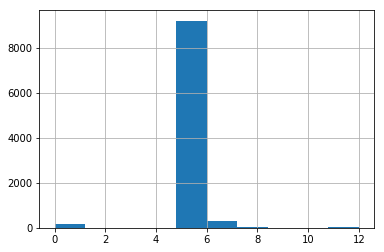

In [218]:
wells_with_facies_not_null['merge'].hist()

In [219]:
wells_with_facies_not_null.describe()

MD          BK_x         GR_x        LIT_x     NKTB_x  \
count  9729.000000   9729.000000  9729.000000  9729.000000  9729.0000   
mean   2337.548546     38.220741    11.294960     1.754034     3.3487   
std     297.437900    438.785427    10.240316     1.363227     0.9774   
min    1670.000000      0.625000     1.400000     1.000000     0.9700   
25%    2098.200000      5.240000     7.940000     1.000000     2.6800   
50%    2420.800000      7.140000     9.240000     1.000000     3.3200   
75%    2589.600000      9.935000    10.960000     1.000000     3.8600   
max    3078.000000  19841.920000   122.272000     6.000000    14.5000   

              SP_x  predict_random_forest_BaseLine_0.75_0.70_f1_0.72  \
count  9729.000000                                       9729.000000   
mean    105.981609                                          5.024566   
std      27.690048                                          0.799306   
min      45.710000                                          0.000000   
25%      90.740000                                          5.000000   
50%     102.000000                                          5.000000   
75%     116.840000                                          5.000000   
max     204.986800                                         12.000000   

       predict_BaseLine_cat_boost_7008          BK_y         GR_y  \
count                      9729.000000   9729.000000  9729.000000   
mean                          4.806660    934.776430     0.749420   
std                           1.210024   2950.504225     2.852284   
min                           0.000000     -1.800459    -2.791667   
25%                           5.000000     -0.305046    -0.166667   
50%                           5.000000      0.327982     0.311821   
75%                           5.000000      1.400000     0.750000   
max                          12.000000  29840.920000    27.198280   

             LIT_y       NKTB_y         SP_y  \
count  9729.000000  9729.000000  9729.000000   
mean      1.754034     0.190576     0.115056   
std       1.363227     0.941533     0.448350   
min       1.000000    -2.144001    -1.648342   
25%       1.000000    -0.414893    -0.099429   
50%       1.000000     0.147369     0.192487   
75%       1.000000     0.648936     0.401368   
max       6.000000    11.789473     1.080574   

       predict_random_forest_0.81_0.82_f1_0.81  \
count                              9729.000000   
mean                                  5.024566   
std                                   0.799306   
min                                   0.000000   
25%                                   5.000000   
50%                                   5.000000   
75%                                   5.000000   
max                                  12.000000   

       predict_BaseLine_cat_boost_1_0.81  merge_result_rf  merge_result_all  
count                        9729.000000      9729.000000       9729.000000  
mean                            5.203104         5.024566      -1420.178024  
std                             0.872922         0.799306       3496.797419  
min                             0.000000         0.000000      -9999.000000  
25%                             5.000000         5.000000          5.000000  
50%                             5.000000         5.000000          5.000000  
75%                             5.000000         5.000000          5.000000  
max                             8.000000        12.000000          8.000000

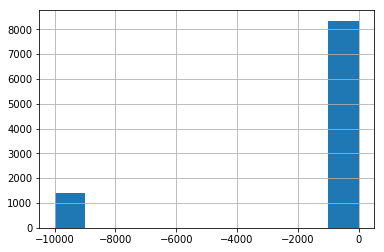

In [220]:
wells_with_facies_not_null['merge_result_all'].hist()

In [224]:
wells_with_facies_not_null_copy = wells_with_facies_not_null.copy()
features_for_remove_not = ['MD',
                               'wellName',
                               'merge_result_all',
                               'merge_result_rf',
                           'BK_x',
                           'SP_x',
                           'GR_x',
                           'LIT_x',
                           'NKTB_x'
                               ]
for name in wells_with_facies_not_null_copy.columns:
    if name not in features_for_remove_not:
        del wells_with_facies_not_null_copy[name]

In [225]:
merge_result_rf = wells_with_facies_not_null_copy.copy()
del merge_result_rf['merge_result_all']
merge_result_rf.to_csv('DATATRAIN18+LAYER_merge_result_rf_smile.csv', index=False)

In [226]:
merge_result_all = wells_with_facies_not_null_copy.copy()
merge_result_all = merge_result_all[merge_result_all['merge_result_all'] > -1]
del merge_result_all['merge_result_rf']
merge_result_all.to_csv('DATATRAIN18+LAYER_merge_result_all_smile.csv', index=False)

In [229]:
merge_result_all[merge_result_all['merge_result_all'] != 5]['wellName'].unique()

array(['spk1521', 'spk1527', 'spk1769', 'spk403', 'spk405R', 'spk409R',
       'spk424R', 'spk428R', 'spk429L'], dtype=object)

In [ ]:
well_copy.to_csv('TRAIN18PRED_98_wells_' + name_model +'_smile.csv', index=False)

In [197]:
wells_with_facies_not_null_copy[wells_with_facies_not_null_copy['MD'] > 1000]

wellName      MD  merge_result_rf  merge_result_all
79       spk1059L  1795.8                5             -9999
80       spk1059L  1796.0                5             -9999
81       spk1059L  1796.2                5             -9999
192      spk1059L  1818.4                5             -9999
193      spk1059L  1818.6                5                 5
194      spk1059L  1818.8                5             -9999
195      spk1059L  1819.0                5                 5
205      spk1059L  1821.0                5             -9999
206      spk1059L  1821.2                5             -9999
207      spk1059L  1821.4                5                 5
208      spk1059L  1821.6                5                 5
209      spk1059L  1821.8                5                 5
219      spk1059L  1823.8                5             -9999
220      spk1059L  1824.0                5                 5
221      spk1059L  1824.2                5                 5
222      spk1059L  1824.4                5                 5
223      spk1059L  1824.6                5                 5
224      spk1059L  1824.8                5                 5
225      spk1059L  1825.0                5             -9999
233      spk1059L  1826.6                5                 5
234      spk1059L  1826.8                5                 5
235      spk1059L  1827.0                5                 5
236      spk1059L  1827.2                5                 5
237      spk1059L  1827.4                5                 5
238      spk1059L  1827.6                5                 5
239      spk1059L  1827.8                5                 5
240      spk1059L  1828.0                5                 5
248      spk1059L  1829.6                5                 5
249      spk1059L  1829.8                5                 5
250      spk1059L  1830.0                5                 5
...           ...     ...              ...               ...
279717  spk1749PL  2669.2                5                 5
279718  spk1749PL  2669.4                5                 5
279719  spk1749PL  2669.6                5                 5
279720  spk1749PL  2669.8                5                 5
279721  spk1749PL  2670.0                5                 5
279722  spk1749PL  2670.2                5                 5
279723  spk1749PL  2670.4                5                 5
279724  spk1749PL  2670.6                5                 5
279725  spk1749PL  2670.8                5                 5
279726  spk1749PL  2671.0                5                 5
279727  spk1749PL  2671.2                5                 5
279728  spk1749PL  2671.4                5                 5
279729  spk1749PL  2671.6                5                 5
279730  spk1749PL  2671.8                5                 5
279731  spk1749PL  2672.0                5                 5
279732  spk1749PL  2672.2                5                 5
279733  spk1749PL  2672.4                5                 5
279734  spk1749PL  2672.6                5                 5
279735  spk1749PL  2672.8                5                 5
279736  spk1749PL  2673.0                5                 5
279737  spk1749PL  2673.2                5                 5
279738  spk1749PL  2673.4                5                 5
279739  spk1749PL  2673.6                5                 5
279740  spk1749PL  2673.8                5                 5
279741  spk1749PL  2674.0                5                 5
279742  spk1749PL  2674.2                5                 5
279743  spk1749PL  2674.4                5                 5
279744  spk1749PL  2674.6                5                 5
279745  spk1749PL  2674.8                5                 5
279746  spk1749PL  2675.0                5                 5

[194317 rows x 4 columns]

In [173]:
def change_null(x):
    undefined_value = -1
    if x == 'NaN':
        return undefined_value
    if x < 0: 
        return undefined_value
    if math.isnan(x):
        return undefined_value
    if math.isinf(x):
        return undefined_value
    return x

wells_with_predict[expert_feature_column + '_'] = wells_with_predict[expert_feature_column].apply(lambda x: change_null(x))
wells_with_predict[for_check_feature_column + '_'] = wells_with_predict[for_check_feature_column].apply(lambda x: change_null(x))
print('All')
view_statistic(wells_with_predict[expert_feature_column + '_'], wells_with_predict[for_check_feature_column + '_'])

All
RMSE ошибка равна 6.0538415067900635
              precision    recall  f1-score   support

           0       0.46      0.03      0.05     28833
           1       0.42      0.32      0.37     14592
           3       0.00      0.00      0.00      1295
           5       0.88      0.86      0.87    206537
           7       0.18      0.44      0.26     27423
           8       0.48      0.28      0.35       832
          12       0.00      0.00      0.00       235

   micro avg       0.69      0.69      0.69    279747
   macro avg       0.35      0.27      0.27    279747
weighted avg       0.74      0.69      0.69    279747



In [115]:
copy_experts = expert_df.copy()

del copy_experts['Facies']

copy_experts['wellName'] = copy_experts['wellName'].apply(lambda x: x.replace('spk', '***'))

copy_experts.to_csv('experts_no_facies.csv', index=False)

In [116]:
copy_experts

wellName    datasetName      MD
0  ***1036  expfacies1036  1720.0
1  ***1036  expfacies1036  1720.2

In [12]:
spk1059L = expert_df[expert_df['wellName'] == 'spk1059L']
spk1059L = spk1059L[spk1059L['MD'] == 2698.4]

In [13]:
spk1059L

wellName      MD     BK         GR LAYER     LIT      NKTB        SP  \
4542  spk1059L  2698.4  84.88  66.154642  Bazh -9999.0  2.511491  5.234224   

      predict_random_forest_f1_0_80  predict_catboost_f1_0_77  
4542                              5                       5.0

In [14]:
spk1059L = for_check_df[for_check_df['wellName'] == 'spk1059L']
spk1059L = spk1059L[spk1059L['MD'] == 2698.4]

In [15]:
spk1059L

wellName      MD     BK     GR LAYER     LIT      NKTB    SP  \
4542  spk1059L  2698.4  84.88  81.08  Bazh -9999.0  2.511491  77.7   

      predict_random_forest_f1_0_84  
4542                              5

In [121]:
expert_no_facies_df = pd.read_csv('experts_no_facies.csv', sep=',')# из файла строку с единицами измерения надо удалить
TRAIN18PRED_df = pd.read_csv('TRAIN18PRED.csv', sep=';')#DATATRAIN18+LAYER TRAIN18PRED

In [122]:
print(expert_no_facies_df.columns)
print(TRAIN18PRED_df.columns)

Index(['wellName', 'datasetName', 'MD'], dtype='object')
Index(['wellName', 'datasetName', 'MD', 'BK', 'GR', 'LAYER', 'LIT', 'NKTB',
       'SP'],
      dtype='object')


In [124]:
expert_no_facies_df['wellName'] = expert_no_facies_df['wellName'].apply(lambda x: x.replace('***', 'spk'))

unicale_wells_expert = expert_no_facies_df['wellName'].unique()
unicale_wells_TRAIN = TRAIN18PRED_df['wellName'].unique()

In [125]:
unicale_wells_expert

array(['spk1036', 'spk1059L', 'spk1061', 'spk1061L', 'spk1062', 'spk1150',
       'spk1205L', 'spk1245PL', 'spk146R', 'spk1504', 'spk1506L',
       'spk1508', 'spk1515', 'spk1517', 'spk1518', 'spk1518L', 'spk1519',
       'spk1519L', 'spk1523', 'spk1524', 'spk1525', 'spk1528', 'spk1529',
       'spk1530', 'spk1531', 'spk1537', 'spk1650PL', 'spk1652PL',
       'spk1654PL', 'spk1656PL', 'spk1660PA', 'spk1662PL', 'spk1663',
       'spk1664PL', 'spk1665PL', 'spk1700', 'spk1701', 'spk1702',
       'spk1703', 'spk1704', 'spk1705', 'spk1706L', 'spk1707', 'spk1708',
       'spk1709', 'spk1710', 'spk1718', 'spk1725', 'spk1740', 'spk1741',
       'spk1742', 'spk1743', 'spk1745L', 'spk1746', 'spk1747',
       'spk1749PL', 'spk1750', 'spk1750PL', 'spk1753', 'spk1755',
       'spk1758', 'spk1760', 'spk1764', 'spk1765', 'spk1768', 'spk1779',
       'spk1779PL', 'spk1785', 'spk1786', 'spk1791', 'spk1792', 'spk1793',
       'spk1794', 'spk1796', 'spk1799PL'], dtype=object)

In [126]:
unicale_wells_TRAIN

array(['spk1059L', 'spk1061', 'spk1061L', 'spk1062', 'spk1205L',
       'spk1245PL', 'spk146R', 'spk1504', 'spk1506L', 'spk1508',
       'spk1515', 'spk1517', 'spk1518L', 'spk1519L', 'spk1523', 'spk1524',
       'spk1525', 'spk1528', 'spk1529', 'spk1530', 'spk1531', 'spk1537',
       'spk1650PL', 'spk1652PL', 'spk1654PL', 'spk1656PL', 'spk1660PA',
       'spk1662PL', 'spk1663', 'spk1664PL', 'spk1665PL', 'spk1700',
       'spk1701', 'spk1702', 'spk1703', 'spk1704', 'spk1705', 'spk1706L',
       'spk1707', 'spk1708', 'spk1709', 'spk1710', 'spk1718', 'spk1725',
       'spk1740', 'spk1741', 'spk1742', 'spk1745L', 'spk1750', 'spk1753',
       'spk1755', 'spk1758', 'spk1760', 'spk1764', 'spk1765', 'spk1779',
       'spk1785', 'spk1786', 'spk1791', 'spk1792', 'spk1793', 'spk1794',
       'spk1796', 'spk1805', 'spk1821', 'spk1822PL', 'spk1826PL',
       'spk214P', 'spk236', 'spk3203', 'spk3203PL', 'spk401', 'spk404',
       'spk407R', 'spk408', 'spk421R', 'spk422R', 'spk425', 'spk437',
       

In [131]:
def get_exist(unicale_wells_expert, unicale_wells_TRAIN):
    result = []
    for name in unicale_wells_expert:
        if name in unicale_wells_TRAIN:
            result.append(name)
    return result

def get_no_exist(unicale_wells_expert, unicale_wells_TRAIN):
    result = []
    for name in unicale_wells_expert:
        if name not in unicale_wells_TRAIN:
            result.append(name)
    return result

    
print(get_no_exist(unicale_wells_TRAIN, unicale_wells_expert))        

['spk1805', 'spk1821', 'spk1822PL', 'spk1826PL', 'spk214P', 'spk236', 'spk3203', 'spk3203PL', 'spk401', 'spk404', 'spk407R', 'spk408', 'spk421R', 'spk422R', 'spk425', 'spk437', 'spk467', 'spk490', 'spk564P', 'spk632', 'spk720PL', 'spk762PL', 'spk764PL', 'spk804', 'spk805', 'spk808', 'spk820PL', 'spk833R', 'spk870PL', 'spk872PL', 'spk874PL', 'spk902', 'spk904', 'spk908', 'spk914', 'spk924L', 'spk941', 'spk963L']


In [130]:
DATATRAIN18_df = pd.read_csv('DATATRAIN18+LAYER.csv', sep=';')#DATATRAIN18+LAYER TRAIN18PRED
unicale_wells_DATATRAIN18 = DATATRAIN18_df['wellName'].unique()
print(get_no_exist(unicale_wells_expert, unicale_wells_DATATRAIN18))  

['spk1036', 'spk1059L', 'spk1061', 'spk1061L', 'spk1062', 'spk1150', 'spk1205L', 'spk1245PL', 'spk146R', 'spk1504', 'spk1506L', 'spk1508', 'spk1515', 'spk1517', 'spk1518', 'spk1518L', 'spk1519', 'spk1519L', 'spk1523', 'spk1524', 'spk1525', 'spk1528', 'spk1529', 'spk1530', 'spk1531', 'spk1537', 'spk1650PL', 'spk1652PL', 'spk1654PL', 'spk1656PL', 'spk1660PA', 'spk1662PL', 'spk1663', 'spk1664PL', 'spk1665PL', 'spk1700', 'spk1701', 'spk1702', 'spk1703', 'spk1704', 'spk1705', 'spk1706L', 'spk1707', 'spk1708', 'spk1709', 'spk1710', 'spk1718', 'spk1725', 'spk1740', 'spk1741', 'spk1742', 'spk1743', 'spk1745L', 'spk1746', 'spk1747', 'spk1749PL', 'spk1750', 'spk1750PL', 'spk1753', 'spk1755', 'spk1758', 'spk1760', 'spk1764', 'spk1765', 'spk1768', 'spk1779', 'spk1779PL', 'spk1785', 'spk1786', 'spk1791', 'spk1792', 'spk1793', 'spk1794', 'spk1796', 'spk1799PL']


In [248]:

def get_well_dfs(all_well_df):
    wall_names_ = all_well_df['wellName'].unique()
    wells = []
    for name in wall_names_:
        display(name)
        well = all_well_df[all_well_df['wellName'] == name]
        wells.append(well)
    return wells


def get_correct_wells(wells):
    def is_md_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        copy_df_ = copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001]
        return copy_df_.empty and df_['MD'].count() > 10

    def print_md_not_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        display(copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001])

    wells_new = []
    for well in wells:
        if is_md_correct(well):
            wells_new.append(well)
        else:
            print(well['wellName'].iloc[0])
            #print_md_not_correct(well)
    return wells_new


def add_wells_features(wells, features_for_detrend):
    wells_new = []
    for well in wells:
        wells_new.append(detrend(well, features_for_detrend))
    return wells_new


def detrend(df, features_for_detrend):
    undefined_value = -9999

    def corrector_detrend(row, name_base, name_detrend):
        if row[name_base] < -999:
            return undefined_value
        if row[name_base] > 500:
            return undefined_value
        if row[name_detrend] > 999:
            return undefined_value
        if row[name_detrend] < -999:
            return undefined_value
        return row[name_detrend]

    import math
    def corrector_nulls(value):
        if math.isnan(value):
            return undefined_value
        if math.isinf(value):
            return undefined_value
        if value == 'NaN':
            return undefined_value
        return value

    def remove_trend(serials):
        from scipy import signal
        return signal.detrend(serials)

    copy_df = df.copy()

    for feature in features_for_detrend:
        prefix = '_det'
        copy_df[feature + prefix] = copy_df[feature] - copy_df[feature].shift(-1)
        copy_df[feature] = copy_df[feature].apply(corrector_nulls)
        copy_df[feature + prefix] = remove_trend(copy_df[feature])
        copy_df[feature + '_detrend'] = copy_df.apply(
            lambda row: corrector_detrend(row, feature, feature + prefix), axis=1)
        del copy_df[feature + prefix]
    return copy_df

def get_problem_wells(wells):
    def is_md_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        copy_df_ = copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001]
        return copy_df_.empty

    def print_md_not_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        display(copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001])

    wells_problem = []
    for well in wells:
        if is_md_correct(well) == False:
            #if well['wellName'].iloc[0] not in ['spk1725', 'spk404', 'spk820PL']:
            print(well['wellName'].iloc[0])
            print_md_not_correct(well)
            wells_problem.append(well)
    return wells_problem

def get_for_learn_clean_df_prod(statistic_df):
    feature = statistic_df.copy()
    del feature['datasetName']
    # feature = feature[feature["Facies"] >= -999]
    # feature = feature[feature["GR"] >= -999]
    # feature = feature[feature["SP"] >= -999]
    feature = feature[feature["MD"] * 10 % 2 < 0.001]
    return feature


name_dataset_for_predict = 'DATATRAIN18+LAYER.csv'

wells_for_predict = get_for_learn_clean_df_prod(pd.read_csv(name_dataset_for_predict, sep=';'))
display(wells_for_predict.describe())
wells_samples_for_predict_df = get_well_dfs(wells_for_predict)
wells_problem = get_problem_wells(wells_samples_for_predict_df)
wells_correct = get_correct_wells(wells_samples_for_predict_df)

MD             BK         Facies             GR  \
count  124293.000000  120405.000000  124293.000000  124293.000000   
mean     1748.137802   -4485.394314   -9746.106804   -2368.398518   
std       728.900358    4984.885072    1570.360334    4260.305934   
min         0.000000   -9999.000000   -9999.000000   -9999.000000   
25%      1238.600000   -9999.000000   -9999.000000       3.183000   
50%      1913.200000       3.700000   -9999.000000       8.120000   
75%      2327.000000       7.270000   -9999.000000      10.800000   
max      3093.000000   22739.520000      12.000000     142.370000   

                 LIT           NKTB             SP  
count  124293.000000  124293.000000  123597.000000  
mean    -8639.245291   -2368.355172   -2305.214981  
std      3427.850167    4254.271400    4309.949812  
min     -9999.000000   -9999.000000   -9999.000000  
25%     -9999.000000       1.960000      34.088360  
50%     -9999.000000       3.086110      94.224880  
75%     -9999.000000       3.823581     117.711600  
max         6.000000      22.582870     578.255500

'spk1521'

'spk1527'

'spk1769'

'spk400'

'spk402'

'spk403'

'spk405R'

'spk406R'

'spk409R'

'spk420R'

'spk424R'

'spk426R'

'spk427R'

'spk428R'

'spk429L'

'spk432R'

'spk967'

In [249]:
wells_problem

[]

In [251]:
spk1527 = wells_for_predict[wells_for_predict['wellName'] == 'spk1527']
spk1527.to_csv('spk1527.csv', index=False)

In [241]:
spk1527_nulleable = spk1527[spk1527['Facies'] == -9999]

In [247]:
spk1527_nulleable[spk1527_nulleable['MD'] > 2400]

wellName      MD     BK  Facies       GR  LAYER   LIT     NKTB     SP
17412  spk1527  2400.2   7.20   -9999     7.52  -9999     4     3.21  56.37
17413  spk1527  2400.4   7.11   -9999     7.29  -9999     4     3.26  57.70
17414  spk1527  2400.6   6.83   -9999     7.21  -9999     4     3.29  59.72
17415  spk1527  2400.8   6.99   -9999     7.56  -9999     4     3.26  61.39
17416  spk1527  2401.0   7.10   -9999     7.74  -9999     4     3.48  66.53
17417  spk1527  2401.2   7.72   -9999     7.91  -9999     4     3.61  69.36
17418  spk1527  2401.4   8.26   -9999     8.10  -9999     4     3.37  70.78
17419  spk1527  2401.6   7.53   -9999     8.27  -9999     4     3.37  71.28
17420  spk1527  2401.8   6.82   -9999     8.34  -9999     4     3.27  71.44
17421  spk1527  2402.0   6.78   -9999     8.28  -9999     4     3.32  71.54
17422  spk1527  2402.2   6.95   -9999     8.28  -9999     4     3.52  69.52
17423  spk1527  2402.4   7.29   -9999     8.16  -9999     4     3.26  67.26
17424  spk1527  2402.6   7.20   -9999     7.88  -9999     4     3.19  65.37
17425  spk1527  2402.8   7.38   -9999     7.74  -9999     4     3.30  64.32
17426  spk1527  2403.0   8.22   -9999     7.62  -9999     1     3.55  64.37
17427  spk1527  2403.2  11.45   -9999     7.46  -9999     1     3.71  65.83
17428  spk1527  2403.4  12.46   -9999     7.29  -9999     1     4.00  67.77
17429  spk1527  2403.6  11.13   -9999     7.46  -9999     1     4.11  67.66
17430  spk1527  2403.8   8.02   -9999     7.92  -9999     1     3.92  67.42
17431  spk1527  2404.0   7.98   -9999     8.10  -9999     4     3.73  68.04
17432  spk1527  2404.2   6.80   -9999     8.05  -9999     4     3.70  68.28
17433  spk1527  2404.4   6.79   -9999     8.00  -9999     4     3.51  65.90
17434  spk1527  2404.6   7.09   -9999     8.01  -9999     4     3.47  62.91
17435  spk1527  2404.8   7.76   -9999     7.97  -9999     4     3.27  62.08
17436  spk1527  2405.0   8.18   -9999     7.78  -9999     4     3.30  61.10
17437  spk1527  2405.2   8.38   -9999     7.64  -9999     4     3.32  59.74
17438  spk1527  2405.4   8.07   -9999     7.53  -9999     4     3.28  60.71
17439  spk1527  2405.6   7.55   -9999     7.63  -9999     4     3.26  61.78
17440  spk1527  2405.8   7.36   -9999     7.76  -9999     4     3.16  61.87
17441  spk1527  2406.0   7.50   -9999     7.82  -9999     4     3.41  61.85
...        ...     ...    ...     ...      ...    ...   ...      ...    ...
19235  spk1527  2764.8   9.68   -9999 -9999.00  UV1_3 -9999 -9999.00  83.46
19236  spk1527  2765.0   9.41   -9999 -9999.00  UV1_3 -9999 -9999.00  83.30
19237  spk1527  2765.2   8.13   -9999 -9999.00  UV1_3 -9999 -9999.00  83.22
19238  spk1527  2765.4   7.26   -9999 -9999.00  UV1_3 -9999 -9999.00  82.37
19239  spk1527  2765.6   3.31   -9999 -9999.00  UV1_3 -9999 -9999.00  79.97
19240  spk1527  2765.8   8.89   -9999 -9999.00  UV1_3 -9999 -9999.00  79.09
19241  spk1527  2766.0  10.62   -9999 -9999.00    UV2 -9999 -9999.00  78.63
19242  spk1527  2766.2  11.86   -9999 -9999.00    UV2 -9999 -9999.00  79.29
19243  spk1527  2766.4  11.39   -9999 -9999.00    UV2 -9999 -9999.00  80.10
19244  spk1527  2766.6  13.49   -9999 -9999.00    UV2 -9999 -9999.00  78.82
19245  spk1527  2766.8  15.93   -9999 -9999.00    UV2 -9999 -9999.00  77.66
19246  spk1527  2767.0  12.67   -9999 -9999.00    UV2 -9999 -9999.00  77.14
19247  spk1527  2767.2  15.08   -9999 -9999.00    UV2 -9999 -9999.00  75.59
19248  spk1527  2767.4  12.19   -9999 -9999.00    UV2 -9999 -9999.00  72.52
19249  spk1527  2767.6   9.92   -9999 -9999.00    UV2 -9999 -9999.00  70.48
19250  spk1527  2767.8   6.34   -9999 -9999.00    UV2 -9999 -9999.00  66.22
19251  spk1527  2768.0   6.96   -9999 -9999.00    UV2 -9999 -9999.00  63.74
19252  spk1527  2768.2   7.99   -9999 -9999.00    UV2 -9999 -9999.00  62.89
19253  spk1527  2768.4   8.27   -9999 -9999.00    UV2 -9999 -9999.00  63.55
19254  spk1527  2768.6   8.02   -9999 -9999.00    UV2 -9999 -9999.00  64.59
19255  spk1527  2768.8   6.56   -9999 -9999.00    UV2 

In [256]:
def get_for_learn_clean_df_prod(statistic_df):
    feature = statistic_df.copy()
    feature = feature[feature["MD"] * 10 % 2 < 0.001]
    return feature


name_dataset_for_predict = 'DATATRAIN18+LAYER_merge_result_all_not_5_smile.csv'

wells_for_predict = get_for_learn_clean_df_prod(pd.read_csv(name_dataset_for_predict, sep=','))
display(wells_for_predict.describe())

MD        BK_x        GR_x       LIT_x      NKTB_x  \
count   188.000000  188.000000  188.000000  188.000000  188.000000   
mean   2481.752128   13.429734    8.292564    3.265957    4.117678   
std     204.013200   18.261165    4.958943    1.353747    1.003609   
min    2076.800000    3.380000    2.520000    1.000000    2.400000   
25%    2252.550000    7.101500    6.222500    2.000000    3.337500   
50%    2591.900000    9.098501    7.095000    4.000000    4.122511   
75%    2647.650000   12.532500    8.316750    4.000000    4.895099   
max    3019.600000  135.420000   45.230000    5.000000    6.930000   

             SP_x  merge_result_all  
count  188.000000        188.000000  
mean    89.878365          4.930851  
std     30.273604          3.104336  
min     46.780000          0.000000  
25%     68.097500          1.000000  
50%     78.140000          7.000000  
75%    109.387000          7.000000  
max    181.835100          8.000000

In [258]:
wells_for_predict[wells_for_predict['wellName'] == 'spk1527'].to_csv('spk1527_restore.csv', index=False)

In [268]:

def get_well_dfs(all_well_df):
    wall_names_ = all_well_df['wellName'].unique()
    wells = []
    for name in wall_names_:
        display(name)
        well = all_well_df[all_well_df['wellName'] == name]
        wells.append(well)
    return wells


def get_correct_wells(wells):
    def is_md_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        copy_df_ = copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001]
        return copy_df_.empty and df_['MD'].count() > 10

    def print_md_not_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        display(copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001])

    wells_new = []
    for well in wells:
        if is_md_correct(well):
            wells_new.append(well)
        else:
            print(well['wellName'].iloc[0])
            #print_md_not_correct(well)
    return wells_new


def add_wells_features(wells, features_for_detrend):
    wells_new = []
    for well in wells:
        wells_new.append(detrend(well, features_for_detrend))
    return wells_new


def detrend(df, features_for_detrend):
    undefined_value = -9999

    def corrector_detrend(row, name_base, name_detrend):
        if row[name_base] < -999:
            return undefined_value
        if row[name_base] > 500:
            return undefined_value
        if row[name_detrend] > 999:
            return undefined_value
        if row[name_detrend] < -999:
            return undefined_value
        return row[name_detrend]

    import math
    def corrector_nulls(value):
        if math.isnan(value):
            return undefined_value
        if math.isinf(value):
            return undefined_value
        if value == 'NaN':
            return undefined_value
        return value

    def remove_trend(serials):
        from scipy import signal
        return signal.detrend(serials)

    copy_df = df.copy()

    for feature in features_for_detrend:
        prefix = '_det'
        copy_df[feature + prefix] = copy_df[feature] - copy_df[feature].shift(-1)
        copy_df[feature] = copy_df[feature].apply(corrector_nulls)
        copy_df[feature + prefix] = remove_trend(copy_df[feature])
        copy_df[feature + '_detrend'] = copy_df.apply(
            lambda row: corrector_detrend(row, feature, feature + prefix), axis=1)
        del copy_df[feature + prefix]
    return copy_df

def get_problem_wells(wells):
    def is_md_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        copy_df_ = copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001]
        return copy_df_.empty  and df_['MD'].count() > 10

    def print_md_not_correct(df_):
        copy_df_ = df_.copy()
        copy_df_['MD_difference'] = abs(copy_df_['MD'] - copy_df_['MD'].shift(1))
        display(copy_df_[copy_df_['MD_difference'] - 0.2 > 0.001])

    wells_problem = []
    for well in wells:
        if is_md_correct(well) == False:
            #if well['wellName'].iloc[0] not in ['spk1725', 'spk404', 'spk820PL']:
            print(well['wellName'].iloc[0])
            print_md_not_correct(well)
            wells_problem.append(well)
    return wells_problem

def get_for_learn_clean_df_prod(statistic_df):
    feature = statistic_df.copy()
    del feature['datasetName']
    # feature = feature[feature["Facies"] >= -999]
    # feature = feature[feature["GR"] >= -999]
    # feature = feature[feature["SP"] >= -999]
    #feature = feature[(feature["MD"] + 10) % 2 < 0.001]
    return feature


name_dataset_for_predict = 'TRAIN18PRED.csv'
one = pd.read_csv(name_dataset_for_predict, sep=';')
two = pd.read_csv('S-POKUR_dop.csv', sep=';')
two['wellName'] = two['wellName'].apply(lambda x: x.replace('***', 'spk'))
del two['AGR']
del two['ASP']
concat_one_two = pd.concat([one, two])
wells_for_predict = get_for_learn_clean_df_prod(concat_one_two)
display(wells_for_predict.describe())
wells_samples_for_predict_df = get_well_dfs(wells_for_predict)
wells_problem = get_problem_wells(wells_samples_for_predict_df)
wells_correct = get_correct_wells(wells_samples_for_predict_df)

MD            BK            GR            LIT          NKTB  \
count  1.051502e+06  8.657520e+05  1.051502e+06  791169.000000  1.051502e+06   
mean   1.845768e+03 -3.930090e+03 -1.090349e+03   -7593.874986 -1.011556e+03   
std    7.706141e+02  1.376726e+04  3.128792e+03    4274.231349  3.020004e+03   
min    0.000000e+00 -9.999000e+03 -9.999000e+03   -9999.000000 -9.999000e+03   
25%    1.387500e+03 -9.999000e+03  5.120000e+00   -9999.000000  1.840000e+00   
50%    2.030600e+03  4.320000e+00  7.417000e+00   -9999.000000  3.010530e+00   
75%    2.427400e+03  7.100000e+00  9.680000e+00   -9999.000000  3.870000e+00   
max    3.270900e+03  9.585299e+06  1.648510e+02       6.000000  3.863000e+01   

                 SP  
count  1.040114e+06  
mean  -3.173564e+03  
std    4.718150e+03  
min   -9.999000e+03  
25%   -9.999000e+03  
50%    5.909000e+01  
75%    1.024500e+02  
max    2.735388e+02

'spk1059L'

'spk1061'

'spk1061L'

'spk1062'

'spk1205L'

'spk1245PL'

'spk146R'

'spk1504'

'spk1506L'

'spk1508'

'spk1515'

'spk1517'

'spk1518L'

'spk1519L'

'spk1523'

'spk1524'

'spk1525'

'spk1528'

'spk1529'

'spk1530'

'spk1531'

'spk1537'

'spk1650PL'

'spk1652PL'

'spk1654PL'

'spk1656PL'

'spk1660PA'

'spk1662PL'

'spk1663'

'spk1664PL'

'spk1665PL'

'spk1700'

'spk1701'

'spk1702'

'spk1703'

'spk1704'

'spk1705'

'spk1706L'

'spk1707'

'spk1708'

'spk1709'

'spk1710'

'spk1718'

'spk1725'

'spk1740'

'spk1741'

'spk1742'

'spk1745L'

'spk1750'

'spk1753'

'spk1755'

'spk1758'

'spk1760'

'spk1764'

'spk1765'

'spk1779'

'spk1785'

'spk1786'

'spk1791'

'spk1792'

'spk1793'

'spk1794'

'spk1796'

'spk1805'

'spk1821'

'spk1822PL'

'spk1826PL'

'spk214P'

'spk236'

'spk3203'

'spk3203PL'

'spk401'

'spk404'

'spk407R'

'spk408'

'spk421R'

'spk422R'

'spk425'

'spk437'

'spk467'

'spk490'

'spk564P'

'spk632'

'spk720PL'

'spk762PL'

'spk764PL'

'spk804'

'spk805'

'spk808'

'spk820PL'

'spk833R'

'spk870PL'

'spk872PL'

'spk874PL'

'spk902'

'spk904'

'spk908'

'spk914'

'spk924L'

'spk941'

'spk963L'

'spk1036'

'spk1150'

'spk1518'

'spk1519'

'spk1743'

'spk1746'

'spk1747'

'spk1749PL'

'spk1750PL'

'spk1768'

'spk1779PL'

'spk1799PL'

In [266]:
spk1725 = wells_problem[0]
display(spk1725[spk1725['MD'] > 2630])

wellName           MD          BK          GR  LAYER  LIT        NKTB  \
414333  spk1725  2630.200012     6.52002     5.97001  UV1_1  NaN     2.37000   
414334  spk1725  2630.400024     6.85002     6.11003  UV1_1  NaN     2.33000   
414335  spk1725  2630.600037     7.02006     6.33011  UV1_1  NaN     2.36999   
414337  spk1725  2631.000000     7.18000     7.42000  UV1_1  NaN     2.25000   
414338  spk1725  2631.200012     6.85001     7.75001  UV1_1  NaN     2.15000   
414339  spk1725  2631.400024     7.02000     7.88998  UV1_1  NaN     2.13000   
414340  spk1725  2631.600037     7.02006     7.68991  UV1_1  NaN     2.16000   
414342  spk1725  2632.000000     7.18000     6.56000  UV1_1  NaN     2.24000   
414343  spk1725  2632.200012     6.85001     6.22000  UV1_1  NaN     2.38000   
414344  spk1725  2632.400024     7.01994     6.18996  UV1_1  NaN     2.40001   
414345  spk1725  2632.600037     6.52006     5.89995  UV1_1  NaN     2.46003   
414347  spk1725  2633.000000     6.85000     5.26000  UV1_1  NaN     2.69000   
414348  spk1725  2633.200012     7.68007     5.14001  UV1_1  NaN     2.70000   
414349  spk1725  2633.400024     9.00980     5.24003  UV1_1  NaN     2.69999   
414350  spk1725  2633.600037     7.50984     5.47009  UV1_1  NaN     2.59998   
414352  spk1725  2634.000000     6.52000     6.60000  UV1_1  NaN     2.47000   
414353  spk1725  2634.200012     7.02001     7.02002  UV1_1  NaN     2.34999   
414354  spk1725  2634.400024     7.18002     7.27000  UV1_1  NaN     2.21000   
414355  spk1725  2634.600037     7.35000     7.30995  UV1_1  NaN     2.19999   
414357  spk1725  2635.000000     7.35000     7.27000  UV1_1  NaN     2.17000   
414358  spk1725  2635.200012     7.85000     7.72001  UV1_1  NaN     2.17000   
414359  spk1725  2635.400024     7.85002     7.93001  UV1_1  NaN     2.09000   
414360  spk1725  2635.600037     8.01009     8.02001  UV1_1  NaN     2.11000   
414362  spk1725  2636.000000     9.18000     7.80000  UV1_1  NaN     2.11000   
414363  spk1725  2636.200012    10.18000     7.49999  UV1_1  NaN     2.09000   
414364  spk1725  2636.400024    10.51000     7.39002  UV1_1  NaN     2.10000   
414365  spk1725  2636.600037    10.67020     7.56998  UV1_1  NaN     2.07999   
414367  spk1725  2637.000000    12.00000     7.36000  UV1_2  NaN     2.07000   
414368  spk1725  2637.200012    11.00980     7.32997  UV1_2  NaN     2.09000   
414369  spk1725  2637.400024     8.67998     6.88993  UV1_2  NaN     2.05999   
...         ...          ...         ...         ...    ...  ...         ...   
414634  spk1725  2690.400024    24.80810 -9999.00000    UV2  NaN -9999.00000   
414635  spk1725  2690.600037    13.16980 -9999.00000    UV2  NaN -9999.00000   
414637  spk1725  2691.000000    14.00000 -9999.00000    UV2  NaN -9999.00000   
414638  spk1725  2691.200012    14.50010 -9999.00000    UV2  NaN -9999.00000   
414639  spk1725  2691.400024    15.49990 -9999.00000    UV2  NaN -9999.00000   
414640  spk1725  2691.600037    14.66970 -9999.00000    UV2  NaN -9999.00000   
414642  spk1725  2692.000000    13.50000 -9999.00000    UV2  NaN -9999.00000   
414643  spk1725  2692.200012    13.82990 -9999.00000    UV2  NaN -9999.00000   
414644  spk1725  2692.400024    12.49990 -9999.00000    UV2  NaN -9999.00000   
414645  spk1725  2692.600037    11.34040 -9999.00000    UV2  NaN -9999.00000   
414647  spk1725  2693.000000    14.83000 -9999.00000    UV2  NaN -9999.00000   
414648  spk1725  2693.200012    19.16040 -9999.00000    UV2  NaN -9999.00000   
414649  spk1725  2693.400024    27.30310 -9999.00000    UV2  NaN -9999.00000   
414650  spk1725  2693.600037    68.37530 -9999.00000    UV2  NaN -9999.00000   
414652  spk1725  2694.000000    17.16000 -9999.00000    UV2  NaN -9999.00000   
414653  spk1725  2694.200012    14.99990 -9999.00000    UV2  NaN -9999.00000   
414654  spk1725  2694.400024    13.82970 -9999.00000    UV2  NaN -9999.00000   
414655  spk1725  2694.600037    11.83960 -9999.00000    UV2  NaN -9999.00000   
414657 